Short inspection in train and validation datasets

In [17]:
import pandas as pd

# File paths
train_path = '../../data/splitted_datasets/allele/beta/train.tsv'
valid_path = '../../data/splitted_datasets/allele/beta/validation.tsv'

# Load the TSV files
train_df = pd.read_csv(train_path, sep='\t')
valid_df = pd.read_csv(valid_path, sep='\t')

# # Print the head (first few rows) and length (number of rows) of both datasets
# print("Train dataset head:")
# print(train_df.head())  # First few rows of the training set
print(f"Train dataset length: {len(train_df)}")

# print("\nValidation dataset head:")
# print(valid_df.head())  # First few rows of the validation set
print(f"Validation dataset length: {len(valid_df)}")


/tmp/ipykernel_113441/381989945.py:8: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_path, sep='\t')


Train dataset length: 280252
Validation dataset length: 210192


In [2]:
import pandas as pd

# File paths
t_path = '../../data/splitted_datasets/allele/beta/train.tsv'
v_path = '../../data/splitted_datasets/allele/beta/validation.tsv'

# Function to count binding and non-binding rows
def count_binding_rows(file_path):
    # Read the TSV file
    df = pd.read_csv(file_path, sep='\t')
    
    # Count the number of binding (1) and non-binding (0) rows
    binding_count = df[df['Binding'] == 1].shape[0]
    non_binding_count = df[df['Binding'] == 0].shape[0]
    
    return binding_count, non_binding_count

# Count for training dataset
train_binding, train_non_binding = count_binding_rows(t_path)
print(f"Training Dataset - Binding: {train_binding}, Non-Binding: {train_non_binding}")

# Count for validation dataset
val_binding, val_non_binding = count_binding_rows(v_path)
print(f"Validation Dataset - Binding: {val_binding}, Non-Binding: {val_non_binding}")

/tmp/ipykernel_218269/3552120905.py:10: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t')


Training Dataset - Binding: 140126, Non-Binding: 140126
Validation Dataset - Binding: 35032, Non-Binding: 175160


/tmp/ipykernel_218269/1833262170.py:9: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_path, sep='\t')


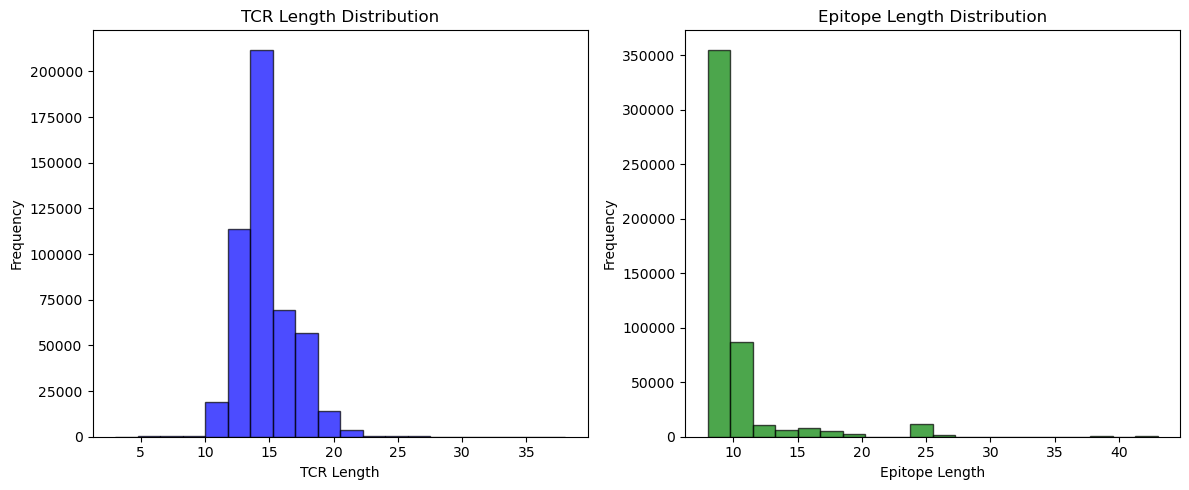

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
train_path = '../../data/splitted_datasets/allele/beta/train.tsv'
valid_path = '../../data/splitted_datasets/allele/beta/validation.tsv'

# Load data
train_df = pd.read_csv(train_path, sep='\t')
valid_df = pd.read_csv(valid_path, sep='\t')

# Combine datasets
data = pd.concat([train_df, valid_df], ignore_index=True)

# Ensure the columns exist
if 'TRB_CDR3' not in data.columns or 'Epitope' not in data.columns:
    raise ValueError("Columns 'TRB_CDR3' and 'Epitope' must exist in the dataset")

# Compute lengths
data['tcr_length'] = data['TRB_CDR3'].astype(str).apply(len)
data['epitope_length'] = data['Epitope'].astype(str).apply(len)

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data['tcr_length'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('TCR Length')
plt.ylabel('Frequency')
plt.title('TCR Length Distribution')

plt.subplot(1, 2, 2)
plt.hist(data['epitope_length'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Epitope Length')
plt.ylabel('Frequency')
plt.title('Epitope Length Distribution')

plt.tight_layout()
plt.show()


In [4]:
# Filter epitopes longer than 26
long_epitopes = data[data['epitope_length'] > 26]

# Count the number of long epitopes
num_long_epitopes = long_epitopes.shape[0]

# Display the long epitopes
print(f"Number of epitopes longer than 26: {num_long_epitopes}")
print("Epitopes longer than 26:")
print(long_epitopes[['Epitope', 'epitope_length']])

Number of epitopes longer than 26: 3112
Epitopes longer than 26:
                                            Epitope  epitope_length
100                     GLEAPFLYLYALVYFLQSINFVRIIMR              27
114                     GLEAPFLYLYALVYFLQSINFVRIIMR              27
119                     GLEAPFLYLYALVYFLQSINFVRIIMR              27
164                     GLEAPFLYLYALVYFLQSINFVRIIMR              27
306                     GLEAPFLYLYALVYFLQSINFVRIIMR              27
...                                             ...             ...
315193  LPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERD              43
315197  ILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASA              43
315255  MIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGV              43
315271  ILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASA              43
315279       WESGVKDCVVLHSYFTSDYYQLYSTQLSTDTGVEHVTF              38

[3112 rows x 2 columns]


Investigations on ProtBERT-Embeddings in oder to get shape, type, etc., and be able to use them in the transformer

Paired

In [5]:
import numpy as np

# Path to the embeddings file
paired_all_epi_path = '../../data/embeddings/paired/allele/Epitope_paired_embeddings.npz'
paired_all_tra_path = '../../data/embeddings/paired/allele/TRA_paired_embeddings.npz'
paired_all_trb_path = '../../data/embeddings/paired/allele/TRB_paired_embeddings.npz'

beta_all_epi_path = '../../data/embeddings/beta/allele/Epitope_beta_embeddings.npz'
beta_all_trb_path = '../../data/embeddings/beta/allele/TRB_beta_embeddings.npz'
paths = [paired_all_epi_path, paired_all_tra_path,paired_all_trb_path ]

paths_beta = [beta_all_epi_path, beta_all_trb_path]
for path in paths_beta:
    # Load the NPZ file
    data = np.load(path)

    # Print available keys in the file
    print("Number of keys in the NPZ file:", len(data.files))

    # Inspect the shape and size of each stored array
    for key in data.files[:10]:
        array = data[key]
        print(f"\nKey: {key}")
        print(f"Shape: {array.shape}")
        print(f"Size: {array.size}")
        print(f"Data Type: {array.dtype}")
        print(f"Sample Data (first 5 elements):\n{array[:5] if array.ndim == 1 else array[:5, :5]}")


Number of keys in the NPZ file: 1896

Key: NLTTRTQL
Shape: (8, 1024)
Size: 8192
Data Type: float32
Sample Data (first 5 elements):
[[ 0.13486663  0.16832928  0.01105008 -0.2017876   0.21350099]
 [ 0.06380487  0.13675283  0.00786234 -0.12408309  0.31762993]
 [ 0.01229951  0.05960181  0.00698517 -0.0671403   0.08832411]
 [ 0.03610628  0.0980993   0.03087564 -0.11637626  0.03888167]
 [ 0.04467435  0.12075185  0.01568509 -0.10579667  0.06191917]]

Key: FIYIFHTL
Shape: (8, 1024)
Size: 8192
Data Type: float32
Sample Data (first 5 elements):
[[ 0.10352622  0.19366597  0.01785575 -0.14839908  0.25590894]
 [-0.05904485  0.1726287   0.08648816  0.00153423  0.19045785]
 [-0.03943206  0.14551184  0.07295718  0.01637407  0.07709593]
 [-0.04497753  0.11167102 -0.02338432  0.08326313  0.1050052 ]
 [-0.02016015  0.17720129  0.05871242  0.01146071  0.08313055]]

Key: YMHHMELPT
Shape: (9, 1024)
Size: 9216
Data Type: float32
Sample Data (first 5 elements):
[[ 0.06514921  0.11687686  0.04630813 -0.1331488

In [4]:
import numpy as np

# Path to the embeddings file
paired_all_epi_path = '../../data/embeddings/paired/allele/Epitope_paired_embeddings.npz'
paired_all_tra_path = '../../data/embeddings/paired/allele/TRA_paired_embeddings.npz'
paired_all_trb_path = '../../data/embeddings/paired/allele/TRB_paired_embeddings.npz'
paths = [paired_all_epi_path, paired_all_tra_path,paired_all_trb_path ]
for path in paths:
    # Load the NPZ file
    data = np.load(path)

    # Print available keys in the file
    print("Number of keys in the NPZ file:", len(data.files))

    # Inspect the shape and size of each stored array
    # for key in data.files[:10]:
    #     array = data[key]
    #     print(f"\nKey: {key}")
    #     print(f"Shape: {array.shape}")
    #     print(f"Size: {array.size}")
    #     print(f"Data Type: {array.dtype}")
    #     print(f"Sample Data (first 5 elements):\n{array[:5] if array.ndim == 1 else array[:5, :5]}")


Number of keys in the NPZ file: 1383
Number of keys in the NPZ file: 41519
Number of keys in the NPZ file: 45261


In [ ]:
# raising error, because length tra != length trb.  To be solved.

import numpy as np
import torch
from torch.nn.utils.rnn import pad_sequence

# Paths to the embeddings files
paired_all_epi_path = '../../data/embeddings/paired/allele/Epitope_paired_embeddings.npz'
paired_all_tra_path = '../../data/embeddings/paired/allele/TRA_paired_embeddings.npz'
paired_all_trb_path = '../../data/embeddings/paired/allele/TRB_paired_embeddings.npz'

# Load NPZ files
epi_data = np.load(paired_all_epi_path, allow_pickle=True)
tra_data = np.load(paired_all_tra_path, allow_pickle=True)
trb_data = np.load(paired_all_trb_path, allow_pickle=True)

# Extract embeddings
epi_embeddings = [torch.tensor(epi_data[key]) for key in epi_data]
tra_embeddings = [torch.tensor(tra_data[key]) for key in tra_data]
trb_embeddings = [torch.tensor(trb_data[key]) for key in trb_data]

# Find max sequence length
max_len = max(max(e.shape[0] for e in epi_embeddings), 
              max(e.shape[0] for e in tra_embeddings), 
              max(e.shape[0] for e in trb_embeddings))

# Pad sequences
def pad_embeddings(embeddings, max_len):
    return pad_sequence([torch.nn.functional.pad(e, (0, 0, 0, max_len - e.shape[0])) for e in embeddings], batch_first=True, padding_value=0.0)

padded_epi = pad_embeddings(epi_embeddings, max_len)
padded_tra = pad_embeddings(tra_embeddings, max_len)
padded_trb = pad_embeddings(trb_embeddings, max_len)

# Concatenate along sequence dimension
padded_combined = torch.cat([padded_tra, padded_trb, padded_epi], dim=1)

# Save padded embeddings
padd_paired_all_epi_path = '../../data/embeddings/paired/allele/padded_Epitope_paired_embeddings.npz'
padd_paired_all_tra_path = '../../data/embeddings/paired/allele/padded_TRA_paired_embeddings.npz'
padd_paired_all_trb_path = '../../data/embeddings/paired/allele/padded_TRB_paired_embeddings.npz'
padd_paired_combined_path = '../../data/embeddings/paired/allele/padded_Combined_paired_embeddings.npz'

np.savez(padd_paired_all_epi_path, **{key: padded_epi[i].numpy() for i, key in enumerate(epi_data)})
np.savez(padd_paired_all_tra_path, **{key: padded_tra[i].numpy() for i, key in enumerate(tra_data)})
np.savez(padd_paired_all_trb_path, **{key: padded_trb[i].numpy() for i, key in enumerate(trb_data)})
np.savez(padd_paired_combined_path, combined=padded_combined.numpy())

print("Padded and concatenated embeddings saved successfully.")


RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 41519 but got size 45261 for tensor number 1 in the list.

## PCA Dimension reduction

In [2]:
import torch
torch.cuda.empty_cache()
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [5]:
beta_all_epi_path = '../../data/embeddings/beta/allele/Epitope_beta_embeddings.npz'
beta_all_trb_path = '../../data/embeddings/beta/allele/TRB_beta_embeddings.npz'

### Beta

In [ ]:
import numpy as np
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler

def apply_incremental_pca(input_path, output_path, n_components=512, batch_size=50000):
    """
    Lädt die Embeddings schrittweise, führt PCA in Chunks durch und speichert die reduzierten Embeddings.
    """
    print(f"📂 Lade Datei: {input_path}")
    data = np.load(input_path, allow_pickle=True)

    # Initialisierung von PCA & Scaler
    pca = IncrementalPCA(n_components=n_components)
    scaler = StandardScaler()

    all_embeddings = []
    key_list = []
    
    # 1️⃣ Schrittweise Verarbeitung in Chunks
    for key in data.files:
        all_embeddings.append(data[key])  # Speichern für den Scaler
        key_list.append(key)

    # In Chunks arbeiten (sonst zu groß für RAM)
    all_embeddings = np.vstack(all_embeddings)
    print(f"🔢 Gesamtshape vor PCA: {all_embeddings.shape}")

    # Normalisierung in Chunks
    for i in range(0, all_embeddings.shape[0], batch_size):
        batch = all_embeddings[i:i+batch_size]
        all_embeddings[i:i+batch_size] = scaler.fit_transform(batch)

    # PCA schrittweise anpassen (fit)
    for i in range(0, all_embeddings.shape[0], batch_size):
        batch = all_embeddings[i:i+batch_size]
        pca.partial_fit(batch)

    # PCA schrittweise transformieren
    reduced_embeddings = np.zeros((all_embeddings.shape[0], n_components))
    for i in range(0, all_embeddings.shape[0], batch_size):
        batch = all_embeddings[i:i+batch_size]
        reduced_embeddings[i:i+batch_size] = pca.transform(batch)

    print(f"✅ Gesamtshape nach PCA: {reduced_embeddings.shape}")

    # 5️⃣ Zurück auf Keys aufteilen & speichern
    start_idx = 0
    reduced_data = {}
    
    for i, key in enumerate(key_list):
        num_samples = data[key].shape[0]
        reduced_data[key] = reduced_embeddings[start_idx:start_idx+num_samples]
        start_idx += num_samples

    np.savez_compressed(output_path, **reduced_data)
    print(f"💾 Reduzierte Embeddings gespeichert unter: {output_path}")

# === PCA für Epitope-Embeddings ===
apply_incremental_pca(
    input_path='../../data/embeddings/beta/allele/Epitope_beta_embeddings.npz',
    output_path='../../data/embeddings/beta/allele/pca/Epitope_beta_embeddings_reduced.npz',
    n_components=512,
    batch_size=50000  # Batch-Größe für schrittweise Verarbeitung
)



📂 Lade Datei: ../../data/embeddings/beta/allele/Epitope_beta_embeddings.npz
🔢 Gesamtshape vor PCA: (19260, 1024)
✅ Gesamtshape nach PCA: (19260, 512)
💾 Reduzierte Embeddings gespeichert unter: ../../data/embeddings/beta/allele/pca/Epitope_beta_embeddings_reduced.npz


In [1]:
import numpy as np
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler

def apply_incremental_pca_large_file(input_path, output_path, n_components=512, batch_size=50000):
    """
    Verarbeitet große NPZ-Dateien schrittweise mit IncrementalPCA, um Speicherüberlauf zu vermeiden.
    """
    print(f"📂 Lade Datei: {input_path}")
    data = np.load(input_path, allow_pickle=True)

    pca = IncrementalPCA(n_components=n_components)
    scaler = StandardScaler()

    key_list = list(data.files)  # Alle Keys speichern
    total_samples = sum(data[key].shape[0] for key in key_list)  # Gesamtzahl der Zeilen berechnen

    print(f"🔢 Gesamtanzahl an Zeilen: {total_samples}")

    # **1️⃣ Schrittweise PCA-Fitting (Training)**
    print("🔄 Starte PCA-Training in Chunks...")
    for i in range(0, total_samples, batch_size):
        batch = []
        for key in key_list:
            batch.append(data[key])
            if len(batch) >= batch_size:
                break  # Beenden, wenn Batch-Größe erreicht ist
        batch = np.vstack(batch)  # Batch zu einer Matrix umwandeln
        batch = scaler.fit_transform(batch)  # Normalisieren
        pca.partial_fit(batch)  # PCA-Fitting
        print(f"✅ PCA angepasst für Batch {i // batch_size + 1}")

    # **2️⃣ Schrittweise Transformation mit PCA**
    print("🔄 Start der PCA-Transformation...")
    reduced_data = {}
    for key in key_list:
        transformed_batch = pca.transform(scaler.transform(data[key]))  # Normalisieren + PCA anwenden
        reduced_data[key] = transformed_batch

    # **3️⃣ Speichern der reduzierten Daten**
    np.savez_compressed(output_path, **reduced_data)
    print(f"💾 Reduzierte Embeddings gespeichert unter: {output_path}")

# **PCA für große TCR-Embeddings**
apply_incremental_pca_large_file(
    input_path='../../data/embeddings/beta/allele/TRB_beta_embeddings.npz',
    output_path='../../data/embeddings/beta/allele/pca/TRB_beta_embeddings_reduced.npz',
    n_components=512,
    batch_size=50000
)

📂 Lade Datei: ../../data/embeddings/beta/allele/TRB_beta_embeddings.npz
🔢 Gesamtanzahl an Zeilen: 3106754
🔄 Starte PCA-Training in Chunks...
✅ PCA angepasst für Batch 1
✅ PCA angepasst für Batch 2
✅ PCA angepasst für Batch 3
✅ PCA angepasst für Batch 4
✅ PCA angepasst für Batch 5
✅ PCA angepasst für Batch 6
✅ PCA angepasst für Batch 7
✅ PCA angepasst für Batch 8
✅ PCA angepasst für Batch 9
✅ PCA angepasst für Batch 10
✅ PCA angepasst für Batch 11
✅ PCA angepasst für Batch 12
✅ PCA angepasst für Batch 13
✅ PCA angepasst für Batch 14
✅ PCA angepasst für Batch 15
✅ PCA angepasst für Batch 16
✅ PCA angepasst für Batch 17
✅ PCA angepasst für Batch 18
✅ PCA angepasst für Batch 19
✅ PCA angepasst für Batch 20
✅ PCA angepasst für Batch 21
✅ PCA angepasst für Batch 22
✅ PCA angepasst für Batch 23
✅ PCA angepasst für Batch 24
✅ PCA angepasst für Batch 25
✅ PCA angepasst für Batch 26
✅ PCA angepasst für Batch 27
✅ PCA angepasst für Batch 28
✅ PCA angepasst für Batch 29
✅ PCA angepasst für Batch 3

In [8]:
import numpy as np

def check_file_details(file_path, num_keys=5):
    """
    Überprüft die ersten `num_keys` Keys und ihre Shapes aus einer `.npz` Datei.
    """
    data = np.load(file_path, allow_pickle=True)
    keys = list(data.keys())

    print(f"Number of keys in the file: {len(keys)}")
    print(f"First {num_keys} keys: {keys[:num_keys]}")

    for key in keys[:num_keys]:  # Nur die ersten `num_keys` Keys ausgeben
        print(f"Shape of '{key}': {data[key].shape}")

# Überprüfe TRB (nur die ersten 5 Keys)
check_file_details('../../data/embeddings/beta/allele/pca/TRB_beta_embeddings_reduced.npz', num_keys=5)

# Überprüfe Epitope (nur die ersten 5 Keys)
check_file_details('../../data/embeddings/beta/allele/pca/Epitope_beta_embeddings_reduced.npz', num_keys=5)


Number of keys in the file: 211529
First 5 keys: ['CASSLEGTGVSGANVLTF', 'CASSPDSNTGELFF', 'CASSHSQGADGELFF', 'CASSYPDNYGYTF', 'CAIILSPPWWGYNEQFF']
Shape of 'CASSLEGTGVSGANVLTF': (18, 512)
Shape of 'CASSPDSNTGELFF': (14, 512)
Shape of 'CASSHSQGADGELFF': (15, 512)
Shape of 'CASSYPDNYGYTF': (13, 512)
Shape of 'CAIILSPPWWGYNEQFF': (17, 512)
Number of keys in the file: 1896
First 5 keys: ['YLDELIKNT', 'IQPGQTFSV', 'FLPSDFFPSV', 'YVVPGSPCL', 'LVMPFSIVYI']
Shape of 'YLDELIKNT': (9, 512)
Shape of 'IQPGQTFSV': (9, 512)
Shape of 'FLPSDFFPSV': (10, 512)
Shape of 'YVVPGSPCL': (9, 512)
Shape of 'LVMPFSIVYI': (10, 512)


In [7]:
import numpy as np

# Paths to the embeddings files
beta_all_epi_path = '../../data/embeddings/beta/allele/Epitope_beta_embeddings.npz'
beta_all_trb_path = '../../data/embeddings/beta/allele/TRB_beta_embeddings.npz'

paths_beta = [beta_all_epi_path, beta_all_trb_path]

for path in paths_beta:
    # Load the NPZ file
    data = np.load(path, allow_pickle=True)

    # Print available keys in the file
    print(f"File: {path}")
    print("Number of keys in the NPZ file:", len(data.files))
    print("Keys in the file:", data.files)

    # Inspect the shape and size of each stored array
    for key in data.files:
        array = data[key]
        print(f"\nKey: {key}")
        print(f"Shape: {array.shape}")
        print(f"Size: {array.size}")
        print(f"Data Type: {array.dtype}")
        print(f"Sample Data (first 5 elements):\n{array[:5] if array.ndim == 1 else array[:5, :5]}")
    print("\n" + "-"*50 + "\n")

File: ../../data/embeddings/beta/allele/Epitope_beta_embeddings.npz
Number of keys in the NPZ file: 1896
Keys in the file: ['YLDELIKNT', 'IQPGQTFSV', 'FLPSDFFPSV', 'YVVPGSPCL', 'LVMPFSIVYI', 'VPHVGEIPVAYRKVLL', 'LMVLHSPSL', 'RLNEVAKNL', 'SEYKGPITDVFYKENSY', 'FLKGIGWIPI', 'RCMLQCPSV', 'SLPFGWLIV', 'CPACYNSEV', 'YMGVVYEM', 'ILCETCLIV', 'TRLALIAPK', 'RPDTRYVLM', 'GTITVEELK', 'KQIYKTPPIKDF', 'LSDRVVFVL', 'LPDDFMGCV', 'TQWSLFFFL', 'FIYIFHTL', 'NLDYIINLI', 'YMHHMELPT', 'FVVPYMIYLL', 'YVVDDPCPI', 'FLKEKGGL', 'NEGVKAAW', 'NIIFLHEDLTV', 'EENLLDFVRF', 'FVGPLDEDF', 'LSITPEIAPYF', 'MIELSLIDFYLCFLAFLLFLVLIML', 'IIKNLSKSLTENKY', 'FLFMYLVMV', 'KLDGFMGRI', 'RLGPVQNEV', 'REGVFVSNGTHW', 'NMLSTVLGV', 'APHGVVFLH', 'WTAGAAAYYVGY', 'WTAGAAAYY', 'ITLATCELY', 'MSAFAMMFV', 'LMWLSYFIA', 'AEHSLQVAY', 'DIAGIGLKTV', 'GQARVAYQV', 'NLAQTDLATV', 'YLAVFDKNL', 'NPANNVAIV', 'ALWGPDPAA', 'YMLDLQPETT', 'FLYNPLTRV', 'SLFWNEPAI', 'FPLCANGQV', 'YVVDDPCPIHFY', 'LPRWYFYYL', 'QVPLRPMTYK', 'RMYSPVSIL', 'LTISPEIPSYF', 'RMEQVDWTV'

KeyboardInterrupt: 

## beta and paired

In [6]:
import torch
torch.cuda.empty_cache()


### Padding embeddings using GPU

In [3]:
import numpy as np
import torch
from torch.nn.utils.rnn import pad_sequence

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Paths to embeddings files
# paired_all_epi_path = '../../data/embeddings/paired/allele/Epitope_paired_embeddings.npz'
# paired_all_tra_path = '../../data/embeddings/paired/allele/TRA_paired_embeddings.npz'
# paired_all_trb_path = '../../data/embeddings/paired/allele/TRB_paired_embeddings.npz'

beta_all_epi_path = '../../data/embeddings/beta/allele/Epitope_beta_embeddings.npz'
beta_all_trb_path = '../../data/embeddings/beta/allele/TRB_beta_embeddings.npz'

# Load NPZ files into GPU
def load_embeddings_to_gpu(path):
    data = np.load(path, allow_pickle=True)
    return {key: torch.tensor(data[key], device=device) for key in data}

# epi_embeddings = load_embeddings_to_gpu(paired_all_epi_path)
# tra_embeddings = load_embeddings_to_gpu(paired_all_tra_path)
# trb_embeddings = load_embeddings_to_gpu(paired_all_trb_path)

beta_epi_embeddings = load_embeddings_to_gpu(beta_all_epi_path)
beta_trb_embeddings = load_embeddings_to_gpu(beta_all_trb_path)

# Find max sequence length
# max_len = max(max(e.shape[0] for e in epi_embeddings.values()), 
#               max(e.shape[0] for e in tra_embeddings.values()), 
#               max(e.shape[0] for e in trb_embeddings.values()))

beta_max_len = max(max(e.shape[0] for e in beta_epi_embeddings.values()), 
                    max(e.shape[0] for e in beta_trb_embeddings.values()))

# Function to pad embeddings on GPU
def pad_embeddings(embeddings, max_len):
    return pad_sequence(
        [torch.nn.functional.pad(e, (0, 0, 0, max_len - e.shape[0])) for e in embeddings.values()],
        batch_first=True, padding_value=0.0
    )

# Pad embeddings (all computations on GPU)
# padded_epi = pad_embeddings(epi_embeddings, max_len)
# padded_tra = pad_embeddings(tra_embeddings, max_len)
# padded_trb = pad_embeddings(trb_embeddings, max_len)

padded_beta_epi = pad_embeddings(beta_epi_embeddings, beta_max_len)
# padded_beta_trb = pad_embeddings(beta_trb_embeddings, beta_max_len)

# Move back to CPU before saving
# padded_epi = padded_epi.cpu().numpy()
# padded_tra = padded_tra.cpu().numpy()
# padded_trb = padded_trb.cpu().numpy()

padded_beta_epi = padded_beta_epi.cpu().numpy()
# padded_beta_trb = padded_beta_trb.cpu().numpy()

# Save padded embeddings
# padd_paired_all_epi_path = '../../data/embeddings/paired/allele/padded_Epitope_paired_embeddings.npz'
# padd_paired_all_tra_path = '../../data/embeddings/paired/allele/padded_TRA_paired_embeddings.npz'
# padd_paired_all_trb_path = '../../data/embeddings/paired/allele/padded_TRB_paired_embeddings.npz'

padd_beta_all_epi_path = '../../data/embeddings/beta/allele/padded_Epitope_beta_embeddings.npz'
# padd_beta_all_trb_path = '../../data/embeddings/beta/allele/padded_TRB_beta_embeddings.npz'

# np.savez(padd_paired_all_epi_path, **{key: padded_epi[i] for i, key in enumerate(epi_embeddings)})
# np.savez(padd_paired_all_tra_path, **{key: padded_tra[i] for i, key in enumerate(tra_embeddings)})
# np.savez(padd_paired_all_trb_path, **{key: padded_trb[i] for i, key in enumerate(trb_embeddings)})

np.savez(padd_beta_all_epi_path, **{key: padded_beta_epi[i] for i, key in enumerate(beta_epi_embeddings)})
# np.savez(padd_beta_all_trb_path, **{key: padded_beta_trb[i] for i, key in enumerate(beta_trb_embeddings)})

print("Padded embedding saved successfully.")


Using device: cuda


OutOfMemoryError: CUDA out of memory. Tried to allocate 2.00 MiB. GPU 0 has a total capacity of 14.56 GiB of which 2.75 MiB is free. Including non-PyTorch memory, this process has 14.56 GiB memory in use. Of the allocated memory 14.38 GiB is allocated by PyTorch, and 64.34 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

#### short inspection into padded embeddings in directory prov.
#### Just to check the Size

In [10]:
paddedepiembpath = '../../data/embeddings/beta/gene/prov/padded_epitope_embeddings_batch_0.npz'
paddedtcrembpath = '../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_0.npz'
paths = [paddedepiembpath, paddedtcrembpath]
for path in paths:
    # Load the NPZ file
    data = np.load(path)

    # Print available keys in the file
    print("Number of keys in the NPZ file:", len(data.files))

    # Inspect the shape and size of each stored array
    for key in data.files[:10]:
        array = data[key]
        print(f"\nKey: {key}")
        print(f"Shape: {array.shape}")
        print(f"Size: {array.size}")
        print(f"Data Type: {array.dtype}")
        # print(f"Sample Data (first 5 elements):\n{array[:5] if array.ndim == 1 else array[:5, :5]}")

Number of keys in the NPZ file: 1896

Key: NLTTRTQL
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: FIYIFHTL
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: YMHHMELPT
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: ILLDWAANI
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: SMWALVISV
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: LYALVYFLQ
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: WLPTGTLLV
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: YVDDVVLGA
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: GTSGSPIVAR
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: LTGHMLDMY
Shape: (43, 1024)
Size: 44032
Data Type: float32
Number of keys in the NPZ file: 10000

Key: CASSSTASRNTGELFF
Shape: (38, 1024)
Size: 38912
Data Type: float32

Key: CASSLVTGEQYF
Shape: (38, 1024)
Size: 38912
Data Type: float32

Key: CASSAHRGGYGYTF
Shape: (38, 1024)
Size: 38912
Data Type: float32

Key: CASSLGRTGGNIQYF
Shape: (38, 1024)
Size: 38912
Data Type: flo

### remove all files in folder 'prov'

In [ ]:
# import os
# import shutil

# # Define the directory path
# directory_path = '../../data/embeddings/beta/gene/prov'

# # Check if the directory exists
# if os.path.exists(directory_path):
#     # Iterate over all files in the directory and remove them
#     for filename in os.listdir(directory_path):
#         file_path = os.path.join(directory_path, filename)
#         try:
#             if os.path.isfile(file_path) or os.path.islink(file_path):
#                 os.unlink(file_path)  # Remove the file or symbolic link
#             elif os.path.isdir(file_path):
#                 shutil.rmtree(file_path)  # Remove the subdirectory
#         except Exception as e:
#             print(f"Failed to delete {file_path}. Reason: {e}")
#     print(f"All files in {directory_path} have been removed.")
# else:
#     print(f"The directory {directory_path} does not exist.")

All files in ../../data/embeddings/beta/gene/prov have been removed.


#### Padding all embeddings and saving in batches

to same length (max(max(len(epitope)), max(len(tcr))))

In [3]:
import pandas as pd
import numpy as np

# Load the training and validation data
train_path = '../../data/splitted_datasets/allele/beta/train.tsv'
validation_path = '../../data/splitted_datasets/allele/beta/validation.tsv'

train_data = pd.read_csv(train_path, sep='\t')
validation_data = pd.read_csv(validation_path, sep='\t')

# Load the embeddings
tcr_embeddings_path = '../../data/embeddings/beta/allele/TRB_beta_embeddings.npz'
epitope_embeddings_path = '../../data/embeddings/beta/allele/Epitope_beta_embeddings.npz'

tcr_embeddings = np.load(tcr_embeddings_path, allow_pickle=True)
epitope_embeddings = np.load(epitope_embeddings_path, allow_pickle=True)

/tmp/ipykernel_185630/2300908741.py:8: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_path, sep='\t')


In [ ]:
import numpy as np
import os

def pad_embeddings_in_batches(embeddings_dict, max_length, batch_size, save_path):
    """
    Pad embeddings in batches and save them incrementally to disk.
    """
    keys = list(embeddings_dict.keys())
    num_batches = (len(keys) + batch_size - 1) // batch_size  # Calculate number of batches

    # Create a directory to save the batches
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    for i in range(num_batches):
        batch_keys = keys[i * batch_size : (i + 1) * batch_size]
        padded_batch = {}

        for key in batch_keys:
            embedding = embeddings_dict[key]
            padded_embedding = np.zeros((max_length, embedding.shape[1]), dtype=embedding.dtype)
            padded_embedding[:embedding.shape[0], :] = embedding
            padded_batch[key] = padded_embedding

        # Save the batch to disk
        batch_save_path = f"{save_path}_batch_{i}.npz"
        np.savez_compressed(batch_save_path, **padded_batch)
        print(f"Saved batch {i + 1}/{num_batches} to {batch_save_path}")

    print("All batches saved successfully!")

# Define batch size (adjust based on memory availability)
batch_size = 10000  # Process 10000 embeddings at a time

# Determine the maximum length for TCR and Epitope embeddings
max_tcr_length = max([embedding.shape[0] for embedding in tcr_embeddings.values()])
max_epitope_length = max([embedding.shape[0] for embedding in epitope_embeddings.values()])

# Calculate the global max_length
max_length = max(max_tcr_length, max_epitope_length)

# Pad and save TCR embeddings in batches using the global max_length
pad_embeddings_in_batches(tcr_embeddings, max_length, batch_size, '../../data/embeddings/beta/allele/padded/padded_tcr_embeddings')

# Pad and save Epitope embeddings in batches using the global max_length
pad_embeddings_in_batches(epitope_embeddings, max_length, batch_size, '../../data/embeddings/beta/allele/padded/padded_epitope_embeddings')

Saved batch 1/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_0.npz
Saved batch 2/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_1.npz
Saved batch 3/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_2.npz
Saved batch 4/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_3.npz
Saved batch 5/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_4.npz
Saved batch 6/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_5.npz
Saved batch 7/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_6.npz
Saved batch 8/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_7.npz
Saved batch 9/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_8.npz
Saved batch 10/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_9.npz
Saved batch 11/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_10.

## Padding on PCA Embeddings

In [14]:
import pandas as pd

# Lade die Daten mit low_memory=False, um Typkonflikte zu vermeiden
train_data = pd.read_csv('../../data/splitted_datasets/allele/beta/train.tsv', sep='\t', low_memory=False)

# Spaltennamen ausgeben
print("Spaltennamen in der Trainingsdatei:")
print(train_data.columns)

# Zeige die ersten paar Zeilen, um die Datenstruktur zu verstehen
print("\nBeispieldaten:")
print(train_data.head())

Spaltennamen in der Trainingsdatei:
Index(['TCR_name\tTRAV\tTRAJ\tTRA_CDR3\tTRBV\tTRBJ\tTRB_CDR3\tTRB_leader\tTRAC\tTRBC\tLinker\tLink_order\tTRA_5_prime_seq\tTRA_3_prime_seq\tTRB_5_prime_seq\tTRB_3_prime_seq\tEpitope\tMHC\tMHC class',
       'TRBC', 'Epitope', 'TRBV', 'TRBJ', 'TRB_CDR3', 'MHC', 'TCR_name',
       'Binding', 'task'],
      dtype='object')

Beispieldaten:
   TCR_name\tTRAV\tTRAJ\tTRA_CDR3\tTRBV\tTRBJ\tTRB_CDR3\tTRB_leader\tTRAC\tTRBC\tLinker\tLink_order\tTRA_5_prime_seq\tTRA_3_prime_seq\tTRB_5_prime_seq\tTRB_3_prime_seq\tEpitope\tMHC\tMHC class  \
0                                                NaN                                                                                                                                               
1                                                NaN                                                                                                                                               
2                                     

In [16]:
import numpy as np
import pandas as pd
import os

# === Lade die Trainingsdaten ===
train_path = '../../data/splitted_datasets/allele/beta/train.tsv'
train_data = pd.read_csv(train_path, sep='\t', low_memory=False)

# === Lade die reduzierten Embeddings ===
tcr_embeddings_path = '../../data/embeddings/beta/allele/pca/TRB_beta_embeddings_reduced.npz'
epitope_embeddings_path = '../../data/embeddings/beta/allele/pca/Epitope_beta_embeddings_reduced.npz'

tcr_data = np.load(tcr_embeddings_path, allow_pickle=True)
epitope_data = np.load(epitope_embeddings_path, allow_pickle=True)

# === Extrahiere die Keys ===
tcr_keys = train_data['TRB_CDR3'].dropna().tolist()
epitope_keys = train_data['Epitope'].dropna().tolist()

# === Nur Keys behalten, die in den Embeddings existieren ===
tcr_keys = [key for key in tcr_keys if key in tcr_data]
epitope_keys = [key for key in epitope_keys if key in epitope_data]

# === Dictionaries mit den Embeddings erstellen ===
tcr_embeddings_dict = {key: tcr_data[key] for key in tcr_keys}
epitope_embeddings_dict = {key: epitope_data[key] for key in epitope_keys}

# === Maximaler Padding-Wert bestimmen ===
max_tcr_length = max(embedding.shape[0] for embedding in tcr_embeddings_dict.values())
max_epitope_length = max(embedding.shape[0] for embedding in epitope_embeddings_dict.values())

max_length = max(max_tcr_length, max_epitope_length)  # Einheitliche Länge für Transformer

print(f"📌 Max TCR Length: {max_tcr_length}, Max Epitope Length: {max_epitope_length}, Final Max Length: {max_length}")

# === Padding-Funktion ===
def pad_embedding(embedding, max_length):
    """
    Padded ein einzelnes Embedding mit Nullen auf max_length.
    """
    padded = np.zeros((max_length, embedding.shape[1]), dtype=embedding.dtype)
    padded[:embedding.shape[0], :] = embedding  # Originalwerte behalten, Rest mit 0 füllen
    return padded

# === Speicherpfade setzen ===
tcr_padded_path = '../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train'
epitope_padded_path = '../../data/embeddings/beta/allele/padded_pca/epitope_padded_batches_train'

os.makedirs(tcr_padded_path, exist_ok=True)
os.makedirs(epitope_padded_path, exist_ok=True)

# === Speicher-Funktion mit Batch-Mechanismus ===
def save_padded_embeddings_in_batches(embeddings_dict, save_dir, batch_size=5000):
    keys = list(embeddings_dict.keys())
    num_batches = (len(keys) + batch_size - 1) // batch_size  # Anzahl der Batches berechnen

    for i in range(num_batches):
        batch_keys = keys[i * batch_size: (i + 1) * batch_size]
        padded_batch = {key: pad_embedding(embeddings_dict[key], max_length) for key in batch_keys}
        
        batch_save_path = os.path.join(save_dir, f"batch_{i}.npz")
        np.savez_compressed(batch_save_path, **padded_batch)
        print(f"✅ Saved batch {i + 1}/{num_batches} to {batch_save_path}")

    print("✅ All batches saved successfully!")

# === TCR Embeddings padden und speichern ===
save_padded_embeddings_in_batches(tcr_embeddings_dict, tcr_padded_path, batch_size=5000)

# === Epitope Embeddings padden und speichern ===
save_padded_embeddings_in_batches(epitope_embeddings_dict, epitope_padded_path, batch_size=5000)

📌 Max TCR Length: 38, Max Epitope Length: 43, Final Max Length: 43
✅ Saved batch 1/36 to ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_0.npz
✅ Saved batch 2/36 to ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_1.npz
✅ Saved batch 3/36 to ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_2.npz
✅ Saved batch 4/36 to ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_3.npz
✅ Saved batch 5/36 to ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_4.npz
✅ Saved batch 6/36 to ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_5.npz
✅ Saved batch 7/36 to ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_6.npz
✅ Saved batch 8/36 to ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_7.npz
✅ Saved batch 9/36 to ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_8.n

In [18]:
import numpy as np
import h5py
import os

def combine_selected_batches_to_hdf5(batch_files, output_path):
    """
    Kombiniert eine spezifische Liste von Batch-Dateien zu einer einzigen HDF5-Datei.
    """
    if not batch_files:
        print(f"❌ Keine Batch-Dateien in der Liste gefunden.")
        return

    # Erstelle eine HDF5-Datei
    with h5py.File(output_path, 'w') as hdf5_file:
        for i, batch_file in enumerate(batch_files):
            batch = np.load(batch_file, allow_pickle=True)

            for key in batch.files:
                if key not in hdf5_file:
                    hdf5_file.create_dataset(key, data=batch[key], compression="gzip")
                else:
                    print(f"⚠️ Duplikat-Key übersprungen: {key}")

            print(f"🔄 Batch {i+1}/{len(batch_files)} verarbeitet: {batch_file}")

    print(f"✅ Finale gepaddete Embeddings gespeichert unter: {output_path}")

# === Liste der TCR Batches definieren ===
tcr_batches = [f"../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_{i}.npz" for i in range(36)]
epitope_batches = ["../../data/embeddings/beta/allele/padded_pca/epitope_padded_batches_train/batch_0.npz"]

# === TCR Batches zusammenführen ===
combine_selected_batches_to_hdf5(
    batch_files=tcr_batches,
    output_path='../../data/embeddings/beta/allele/padded_pca/padded_train_tcr_embeddings_final.h5'
)

# === Epitope Batch zusammenführen ===
combine_selected_batches_to_hdf5(
    batch_files=epitope_batches,
    output_path='../../data/embeddings/beta/allele/padded_pca/padded_train_epitope_embeddings_final.h5'
)

🔄 Batch 1/36 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_0.npz
🔄 Batch 2/36 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_1.npz
🔄 Batch 3/36 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_2.npz
🔄 Batch 4/36 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_3.npz
🔄 Batch 5/36 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_4.npz
🔄 Batch 6/36 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_5.npz
🔄 Batch 7/36 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_6.npz
🔄 Batch 8/36 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_7.npz
🔄 Batch 9/36 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_8.npz
🔄 Batch 10/36 verarbeitet: .

In [3]:
def combine_selected_batches_to_hdf5(batch_files, output_path):
    """
    Kombiniert eine spezifische Liste von Batch-Dateien zu einer einzigen HDF5-Datei.
    """
    if not batch_files:
        print(f"❌ Keine Batch-Dateien in der Liste gefunden.")
        return

    # Erstelle eine HDF5-Datei
    with h5py.File(output_path, 'w') as hdf5_file:
        for i, batch_file in enumerate(batch_files):
            batch = np.load(batch_file, allow_pickle=True)

            for key in batch.files:
                if key not in hdf5_file:
                    hdf5_file.create_dataset(key, data=batch[key], compression="gzip")
                else:
                    print(f"⚠️ Duplikat-Key übersprungen: {key}")

            print(f"🔄 Batch {i+1}/{len(batch_files)} verarbeitet: {batch_file}")

    print(f"✅ Finale gepaddete Embeddings gespeichert unter: {output_path}")


In [63]:
import os
import numpy as np
import pandas as pd

# === Lade den Validierungsdatensatz ===
validation_path = '../../data/splitted_datasets/allele/beta/validation.tsv'
valid_data = pd.read_csv(validation_path, sep='\t', low_memory=False)

# === Lade die Keys aus dem Validierungsdatensatz ===
valid_tcr_keys = valid_data['TRB_CDR3'].dropna().tolist()
valid_epitope_keys = valid_data['Epitope'].dropna().tolist()

# === Nur Keys behalten, die in den Embeddings existieren ===
valid_tcr_keys = [key for key in valid_tcr_keys if key in tcr_data]
valid_epitope_keys = [key for key in valid_epitope_keys if key in epitope_data]

# === Dictionaries für Validierungs-Embeddings erstellen ===
valid_tcr_embeddings_dict = {key: tcr_data[key] for key in valid_tcr_keys}
valid_epitope_embeddings_dict = {key: epitope_data[key] for key in valid_epitope_keys}

# === Speicherpfade für Validierungsdaten setzen ===
valid_tcr_padded_path = '../../data/embeddings/beta/allele/padded_pca/valid_tcr_padded_batches'
valid_epitope_padded_path = '../../data/embeddings/beta/allele/padded_pca/valid_epitope_padded_batches'

os.makedirs(valid_tcr_padded_path, exist_ok=True)
os.makedirs(valid_epitope_padded_path, exist_ok=True)

# === Padding-Länge auf die gleiche Länge wie Train setzen ===
max_length = 43  # Fix auf 43, damit gleich wie bei Train

# Padding-Funktion mit fester Länge 43
def pad_embedding(embedding, max_length=43):
    padded = np.zeros((max_length, embedding.shape[1]), dtype=embedding.dtype)
    padded[:embedding.shape[0], :] = embedding
    return padded

# === Validierungsdaten padden und speichern ===
save_padded_embeddings_in_batches(valid_tcr_embeddings_dict, valid_tcr_padded_path, batch_size=5000)
save_padded_embeddings_in_batches(valid_epitope_embeddings_dict, valid_epitope_padded_path, batch_size=5000)

# === Validierungs-Batches zusammenführen ===
valid_tcr_batches = [f"../../data/embeddings/beta/allele/padded_pca/valid_tcr_padded_batches/batch_{i}.npz" for i in range(15)]
valid_epitope_batches = ["../../data/embeddings/beta/allele/padded_pca/valid_epitope_padded_batches/batch_0.npz"]

combine_selected_batches_to_hdf5(
    batch_files=valid_tcr_batches,
    output_path='../../data/embeddings/beta/allele/padded_pca/padded_valid_tcr_embeddings_final.h5'
)

combine_selected_batches_to_hdf5(
    batch_files=valid_epitope_batches,
    output_path='../../data/embeddings/beta/allele/padded_pca/padded_valid_epitope_embeddings_final.h5'
)

✅ Saved batch 1/15 to ../../data/embeddings/beta/allele/padded_pca/valid_tcr_padded_batches/batch_0.npz
✅ Saved batch 2/15 to ../../data/embeddings/beta/allele/padded_pca/valid_tcr_padded_batches/batch_1.npz
✅ Saved batch 3/15 to ../../data/embeddings/beta/allele/padded_pca/valid_tcr_padded_batches/batch_2.npz
✅ Saved batch 4/15 to ../../data/embeddings/beta/allele/padded_pca/valid_tcr_padded_batches/batch_3.npz
✅ Saved batch 5/15 to ../../data/embeddings/beta/allele/padded_pca/valid_tcr_padded_batches/batch_4.npz
✅ Saved batch 6/15 to ../../data/embeddings/beta/allele/padded_pca/valid_tcr_padded_batches/batch_5.npz
✅ Saved batch 7/15 to ../../data/embeddings/beta/allele/padded_pca/valid_tcr_padded_batches/batch_6.npz
✅ Saved batch 8/15 to ../../data/embeddings/beta/allele/padded_pca/valid_tcr_padded_batches/batch_7.npz
✅ Saved batch 9/15 to ../../data/embeddings/beta/allele/padded_pca/valid_tcr_padded_batches/batch_8.npz
✅ Saved batch 10/15 to ../../data/embeddings/beta/allele/padded_

In [2]:
import os
import numpy as np
import pandas as pd

# === Lade den Testdatensatz ===
test_path = '../../data/splitted_datasets/allele/beta/test.tsv'
test_data = pd.read_csv(test_path, sep='\t', low_memory=False)

# === Lade die reduzierten Embeddings ===
tcr_embeddings_path = '../../data/embeddings/beta/allele/pca/TRB_beta_embeddings_reduced.npz'
epitope_embeddings_path = '../../data/embeddings/beta/allele/pca/Epitope_beta_embeddings_reduced.npz'

tcr_data = np.load(tcr_embeddings_path, allow_pickle=True)
epitope_data = np.load(epitope_embeddings_path, allow_pickle=True)

# === Lade die Keys aus dem Testdatensatz ===
test_tcr_keys = test_data['TRB_CDR3'].dropna().tolist()
test_epitope_keys = test_data['Epitope'].dropna().tolist()

# === Nur Keys behalten, die in den Embeddings existieren ===
test_tcr_keys = [key for key in test_tcr_keys if key in tcr_data]
test_epitope_keys = [key for key in test_epitope_keys if key in epitope_data]

# === Dictionaries für Test-Embeddings erstellen ===
test_tcr_embeddings_dict = {key: tcr_data[key] for key in test_tcr_keys}
test_epitope_embeddings_dict = {key: epitope_data[key] for key in test_epitope_keys}

# === Speicherpfade für Testdaten setzen ===
test_tcr_padded_path = '../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches'
test_epitope_padded_path = '../../data/embeddings/beta/allele/padded_pca/test_epitope_padded_batches'

os.makedirs(test_tcr_padded_path, exist_ok=True)
os.makedirs(test_epitope_padded_path, exist_ok=True)

# === Padding-Länge auf die gleiche Länge wie Train & Validation setzen ===
max_length = 43  # Fix auf 43

# Padding-Funktion mit fester Länge 43
def pad_embedding(embedding, max_length=43):
    padded = np.zeros((max_length, embedding.shape[1]), dtype=embedding.dtype)
    padded[:embedding.shape[0], :] = embedding
    return padded

# Speicher-Funktion mit Batch-Mechanismus
def save_padded_embeddings_in_batches(embeddings_dict, save_dir, batch_size=5000):
    keys = list(embeddings_dict.keys())
    num_batches = (len(keys) + batch_size - 1) // batch_size  # Anzahl der Batches berechnen
    for i in range(num_batches):
        batch_keys = keys[i * batch_size: (i + 1) * batch_size]
        batch_save_path = os.path.join(save_dir, f"batch_{i}.npz")
        np.savez_compressed(batch_save_path, **{key: pad_embedding(embeddings_dict[key], max_length) for key in batch_keys})
        print(f"✅ Saved batch {i + 1}/{num_batches} to {batch_save_path}")

    print("✅ All batches saved successfully!")

# === Testdaten padden und speichern ===
save_padded_embeddings_in_batches(test_tcr_embeddings_dict, test_tcr_padded_path, batch_size=5000)
save_padded_embeddings_in_batches(test_epitope_embeddings_dict, test_epitope_padded_path, batch_size=5000)

# === Test-Batches zusammenführen ===
test_tcr_batches = [f"../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_{i}.npz" for i in range(20)]
test_epitope_batches = ["../../data/embeddings/beta/allele/padded_pca/test_epitope_padded_batches/batch_0.npz"]

combine_selected_batches_to_hdf5(
    batch_files=test_tcr_batches,
    output_path='../../data/embeddings/beta/allele/padded_pca/padded_test_tcr_embeddings_final.h5'
)

combine_selected_batches_to_hdf5(
    batch_files=test_epitope_batches,
    output_path='../../data/embeddings/beta/allele/padded_pca/padded_test_epitope_embeddings_final.h5'
)

✅ Saved batch 1/20 to ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_0.npz
✅ Saved batch 2/20 to ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_1.npz
✅ Saved batch 3/20 to ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_2.npz
✅ Saved batch 4/20 to ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_3.npz
✅ Saved batch 5/20 to ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_4.npz
✅ Saved batch 6/20 to ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_5.npz
✅ Saved batch 7/20 to ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_6.npz
✅ Saved batch 8/20 to ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_7.npz
✅ Saved batch 9/20 to ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_8.npz
✅ Saved batch 10/20 to ../../data/embeddings/beta/allele/padded_pca/test_

NameError: name 'combine_selected_batches_to_hdf5' is not defined

In [5]:
import h5py
combine_selected_batches_to_hdf5(
    batch_files=test_tcr_batches,
    output_path='../../data/embeddings/beta/allele/padded_pca/padded_test_tcr_embeddings_final.h5'
)

combine_selected_batches_to_hdf5(
    batch_files=test_epitope_batches,
    output_path='../../data/embeddings/beta/allele/padded_pca/padded_test_epitope_embeddings_final.h5'
)

🔄 Batch 1/20 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_0.npz
🔄 Batch 2/20 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_1.npz
🔄 Batch 3/20 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_2.npz
🔄 Batch 4/20 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_3.npz
🔄 Batch 5/20 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_4.npz
🔄 Batch 6/20 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_5.npz
🔄 Batch 7/20 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_6.npz
🔄 Batch 8/20 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_7.npz
🔄 Batch 9/20 verarbeitet: ../../data/embeddings/beta/allele/padded_pca/test_tcr_padded_batches/batch_8.npz
🔄 Batch 10/20 verarbeitet: ../../data

In [1]:
import numpy as np
import h5py

def check_file_details(file_path, num_keys=5):
    """
    Überprüft die ersten `num_keys` Keys und ihre Shapes aus einer `.npz` oder `.h5` Datei.
    """
    if file_path.endswith('.npz'):
        # Lade .npz-Datei
        data = np.load(file_path, allow_pickle=True)
        keys = list(data.keys())

        print(f"📂 Datei: {file_path}")
        print(f"🔢 Anzahl der Keys: {len(keys)}")
        print(f"📌 Erste {num_keys} Keys: {keys[:num_keys]}")

        for key in keys[:num_keys]:
            print(f"🔹 Shape von '{key}': {data[key].shape}")

    elif file_path.endswith('.h5'):
        # Lade .h5-Datei
        with h5py.File(file_path, 'r') as data:
            keys = list(data.keys())

            print(f"📂 Datei: {file_path}")
            print(f"🔢 Anzahl der Keys: {len(keys)}")
            print(f"📌 Erste {num_keys} Keys: {keys[:num_keys]}")

            for key in keys[:num_keys]:
                print(f"🔹 Shape von '{key}': {data[key].shape}")

    else:
        print(f"❌ Unbekanntes Dateiformat für: {file_path}")

# === Überprüfe `.npz` Dateien (PCA TRB & Epitope) ===
check_file_details('../../data/embeddings/beta/allele/pca/TRB_beta_embeddings_reduced.npz', num_keys=5)
check_file_details('../../data/embeddings/beta/allele/pca/Epitope_beta_embeddings_reduced.npz', num_keys=5)

# === Überprüfe `.h5` Dateien (Padded TRB & Epitope) Train ===
check_file_details('../../data/embeddings/beta/allele/padded_pca/padded_train_tcr_embeddings_final.h5', num_keys=5)
check_file_details('../../data/embeddings/beta/allele/padded_pca/padded_train_epitope_embeddings_final.h5', num_keys=5)

# === Überprüfe `.h5` Dateien (Padded TRB & Epitope) Valid ===
check_file_details('../../data/embeddings/beta/allele/padded_pca/padded_valid_tcr_embeddings_final.h5', num_keys=5)
check_file_details('../../data/embeddings/beta/allele/padded_pca/padded_valid_epitope_embeddings_final.h5', num_keys=5)

# === Überprüfe `.h5` Dateien (Padded TRB & Epitope) Test ===
check_file_details('../../data/embeddings/beta/allele/padded_pca/padded_test_tcr_embeddings_final.h5', num_keys=5)
check_file_details('../../data/embeddings/beta/allele/padded_pca/padded_test_epitope_embeddings_final.h5', num_keys=5)

📂 Datei: ../../data/embeddings/beta/allele/pca/TRB_beta_embeddings_reduced.npz
🔢 Anzahl der Keys: 211529
📌 Erste 5 Keys: ['CASSLEGTGVSGANVLTF', 'CASSPDSNTGELFF', 'CASSHSQGADGELFF', 'CASSYPDNYGYTF', 'CAIILSPPWWGYNEQFF']
🔹 Shape von 'CASSLEGTGVSGANVLTF': (18, 512)
🔹 Shape von 'CASSPDSNTGELFF': (14, 512)
🔹 Shape von 'CASSHSQGADGELFF': (15, 512)
🔹 Shape von 'CASSYPDNYGYTF': (13, 512)
🔹 Shape von 'CAIILSPPWWGYNEQFF': (17, 512)
📂 Datei: ../../data/embeddings/beta/allele/pca/Epitope_beta_embeddings_reduced.npz
🔢 Anzahl der Keys: 1896
📌 Erste 5 Keys: ['YLDELIKNT', 'IQPGQTFSV', 'FLPSDFFPSV', 'YVVPGSPCL', 'LVMPFSIVYI']
🔹 Shape von 'YLDELIKNT': (9, 512)
🔹 Shape von 'IQPGQTFSV': (9, 512)
🔹 Shape von 'FLPSDFFPSV': (10, 512)
🔹 Shape von 'YVVPGSPCL': (9, 512)
🔹 Shape von 'LVMPFSIVYI': (10, 512)
📂 Datei: ../../data/embeddings/beta/allele/padded_pca/padded_train_tcr_embeddings_final.h5
🔢 Anzahl der Keys: 177220
📌 Erste 5 Keys: ['C*EFVGLAGGCTDTQYF', 'C*GTRPSISVPAA**RETGELFF', 'C*GTRPSISVPAACIYYLDHP*QFF'

In [3]:
import numpy as np

# Lade eine der .npz Batch-Dateien
batch_file = "../../data/embeddings/beta/allele/padded_pca/tcr_padded_batches_train/batch_0.npz"
batch_data = np.load(batch_file, allow_pickle=True)

# Überprüfe, ob Keys mit `*` existieren
batch_keys = list(batch_data.keys())

print("🔍 Erster Key in .npz Batch-Datei:", batch_keys[:15])

# Lade eine der .npz Batch-Dateien
batch_file = "../../data/embeddings/beta/allele/padded_pca/valid_tcr_padded_batches/batch_0.npz"
batch_data = np.load(batch_file, allow_pickle=True)

# Überprüfe, ob Keys mit `*` existieren
batch_keys = list(batch_data.keys())

print("🔍 Erster Key in .npz Batch-Datei:", batch_keys[:15])

🔍 Erster Key in .npz Batch-Datei: ['CASRTQRWETQYF', 'CASRGGSGELF', 'CASRKGQGDWEAF', 'CASSGFRDRVNEQYF', 'CASQSGFLSNSPLHF', 'CASIWAGLGQPQHF', 'CASRLATLVGNEQF', 'CASRQQGLGSPLHF', 'CASRSGSLNTEAF', 'CASRYQGLGQPQHF', 'CASSATGADQPQHF', 'CASSDYSNQPQHF', 'CASSEGMGQPQHF', 'CASSGQGMGYTF', 'CASSIEFDRGAPTEQYF']
🔍 Erster Key in .npz Batch-Datei: ['CASSPTQGAVNEQYF', 'CASSLGETQYF', 'CASSQLAGVEQFF', 'CASSWDRSYEQYF', 'CASSSYSYEQYF', 'CASSQGQGEINTGELFF', 'CASRSDKYQETQYF', 'CASSPGTGAYEQYF', 'CASSSPFSASSYEQYF', 'CASSLGQGASYEQYF', 'CASAGTSESRQFF', 'CASSLAPDRVEGQPQHF', 'CSARDRRGNTIYF', 'CASSIDRGPLNQPQHF', 'CASSLGGGGLFF']


##### Checking dimensions of subset padded emb

In [ ]:
# let's check if the dimensions in the version2 were padded correctly for both epitopes and tcrs
padd_beta_all_epi_path = './dummy_data/subset_padded_epitope_embeddings.npz'
padd_beta_all_trb_path = './dummy_data/subset_padded_tcr_embeddings.npz'

paths = [padd_beta_all_epi_path, padd_beta_all_trb_path]
for path in paths:
    # Load the NPZ file
    data = np.load(path)

    # Print available keys in the file
    print("Number of keys in the NPZ file:", len(data.files))

    # Inspect the shape and size of each stored array
    for key in data.files[:5]:
        array = data[key]
        print(f"\nKey: {key}")
        print(f"Shape: {array.shape}")
        print(f"Size: {array.size}")
        print(f"Data Type: {array.dtype}")
        # print(f"Sample Data (first 5 elements):\n{array[:5] if array.ndim == 1 else array[:5, :5]}")


In [1]:
import pandas as pd
import numpy as np
import os

def load_padded_embeddings(save_path_pattern):
    """
    Load padded embeddings saved in batches.
    """
    padded_embeddings = {}
    i = 0

    while True:
        batch_path = f"{save_path_pattern}_batch_{i}.npz"
        if not os.path.exists(batch_path):
            break  # Stop if no more batches exist

        batch = np.load(batch_path, allow_pickle=True)
        for key in batch.files:
            padded_embeddings[key] = batch[key]
        
        # if i == 3: # prov
        #     break
        i += 1

    print(f"Loaded {len(padded_embeddings)} embeddings from {i} batches.")
    return padded_embeddings

# Load TCR embeddings
padded_tcr_embeddings = load_padded_embeddings('../../data/embeddings/beta/allele/padded/padded_tcr_embeddings')

# Load Epitope embeddings
padded_epitope_embeddings = load_padded_embeddings('../../data/embeddings/beta/allele/padded/padded_epitope_embeddings')

: 

In [ ]:
#  TCR_name         TRBV        TRBJ            TRB_CDR3 TRBC    Epitope  \
# 0      257  TRBV20-1*01  TRBJ2-5*01  CSARIWPYPAGGEETQYF  NaN  KLGGALQAK   
# 1      358    TRBV28*01  TRBJ2-1*01     CASSKGLAGLDEQFF  NaN   RAKFKQLL   
# 2      382   TRBV6-6*01  TRBJ2-5*01     CATQTPDSRRETQYF  NaN  KLGGALQAK   
# 3      393  TRBV20-1*01  TRBJ1-2*01     CSARDLDSLTNGYTF  NaN  KLGGALQAK   
# 4      396  TRBV10-2*01  TRBJ2-7*01       CASSEDREDEQYF  NaN  KLGGALQAK   

#            MHC  Binding  task  
# 0  HLA-A*03:01        1   NaN  
# 1  HLA-B*08:01        1   NaN  
# 2  HLA-A*03:01        1   NaN  
# 3  HLA-A*03:01        1   NaN  
# 4  HLA-A*03:01        1   NaN  
# Train dataset length: 319226

In [3]:
import os
print(os.getcwd())
print(os.listdir())

/home/ubuntu/oscar/BA-Cancer-Immunotherapy
['configs', 'models_scripts', 'test-wandb.ipynb', 'O__building_V1.ipynb', '.gitignore', 'dummy_data', 'data_pipeline_TCRPeg.ipynb', 'data_scripts', 'data_pipeline_ProtBERT_fulldata.ipynb', 'datacheck_for_testfile.ipynb', 'data_pipeline_ProtBERT_testfileonly.ipynb', 'results', 'models', 'prov_emb_tcrpeg', 'physicochemical-properties.ipynb', '.git', 'V1_rough_out.py', 'building_V1_ProtBERT.ipynb', 'README.md', 'ENV.yml', 'data_pipeline_10x-allrows50-datacheck.ipynb', 'data_pipeline_ProtBERT.ipynb', 'utils']


### Generating dummy/subsets to try the model and pipeline

#### discarding from subset_train and subset_validation all the missing tcrs in the embeddings

In [25]:
import pandas as pd
import numpy as np
import h5py
import os
from tqdm import tqdm

# === 🔹 File Paths ===
train_path = '../../data/splitted_datasets/allele/beta/train.tsv'
valid_path = '../../data/splitted_datasets/allele/beta/validation.tsv'
subset_dir = './dummy_data'
os.makedirs(subset_dir, exist_ok=True)

subset_size = 40000  # 🔥 Anzahl der gewünschten Samples

# === 🔹 Lade Trainings- & Validierungsdaten ===
train_df = pd.read_csv(train_path, sep='\t', low_memory=False)
valid_df = pd.read_csv(valid_path, sep='\t', low_memory=False)

# === 🔹 Lade existierende Keys aus den gepaddeten HDF5 Embeddings ===
def load_existing_keys_from_hdf5(h5_path):
    """Lädt alle existierenden Keys aus der HDF5-Datei."""
    with h5py.File(h5_path, 'r') as h5_file:
        return set(h5_file.keys())

print("📌 Lade existierende Keys aus HDF5...")

# Train-Embeddings
existing_train_tcr_keys = load_existing_keys_from_hdf5('../../data/embeddings/beta/allele/padded_pca/padded_train_tcr_embeddings_final.h5')
existing_train_epitope_keys = load_existing_keys_from_hdf5('../../data/embeddings/beta/allele/padded_pca/padded_train_epitope_embeddings_final.h5')

# Validation-Embeddings
existing_valid_tcr_keys = load_existing_keys_from_hdf5('../../data/embeddings/beta/allele/padded_pca/padded_valid_tcr_embeddings_final.h5')
existing_valid_epitope_keys = load_existing_keys_from_hdf5('../../data/embeddings/beta/allele/padded_pca/padded_valid_epitope_embeddings_final.h5')

# === 🔹 Filtere `train_df` nach existierenden Train-Embeddings ===
train_df_filtered = train_df[
    train_df['TRB_CDR3'].isin(existing_train_tcr_keys) &
    train_df['Epitope'].isin(existing_train_epitope_keys)
]

# === 🔹 Filtere `valid_df` nach existierenden Validation-Embeddings ===
valid_df_filtered = valid_df[
    valid_df['TRB_CDR3'].isin(existing_valid_tcr_keys) &
    valid_df['Epitope'].isin(existing_valid_epitope_keys)
]

print(f"📌 Gefilterte Trainingsgröße: {len(train_df_filtered)}")
print(f"📌 Gefilterte Validierungsgröße: {len(valid_df_filtered)}")

# === 🔹 Sicherstellen, dass genau 50.000 Samples gezogen werden ===
def ensure_sample_size(df, size, dataset_name):
    while True:
        sampled_df = df.sample(n=min(size + 5000, len(df)), random_state=42)  # 🔥 Erst mehr als nötig samplen
        valid_sampled_df = sampled_df[
            sampled_df['TRB_CDR3'].isin(existing_train_tcr_keys if dataset_name == "Train" else existing_valid_tcr_keys) &
            sampled_df['Epitope'].isin(existing_train_epitope_keys if dataset_name == "Train" else existing_valid_epitope_keys)
        ]
        if len(valid_sampled_df) >= size:
            return valid_sampled_df.sample(n=size, random_state=42)  # 🔥 Falls zu viele, genau 50.000 ziehen
        print(f"⚠️ {dataset_name}: Neu samplen, weil nur {len(valid_sampled_df)} gültige Samples gefunden!")

# === 🔹 Ziehe genau 50.000 Samples für Training & Validation ===
subset_train = ensure_sample_size(train_df_filtered, subset_size, "Train")
subset_valid = ensure_sample_size(valid_df_filtered, subset_size, "Validation")

# === 🔹 Speichere die gefilterten Subsets ===
print('💾 Saving filtered subsets...')
subset_train.to_csv(os.path.join(subset_dir, 'subset_train_filtered.tsv'), sep='\t', index=False)
subset_valid.to_csv(os.path.join(subset_dir, 'subset_validation_filtered.tsv'), sep='\t', index=False)

print(f"✅ Subsampled Training Size: {len(subset_train)}")
print(f"✅ Subsampled Validation Size: {len(subset_valid)}")

# === 🔹 Lade Embeddings aus den gepaddeten HDF5 Dateien ===
def load_embeddings_from_hdf5(file_path, keys_to_extract):
    """ Lädt Embeddings nur für vorhandene Keys aus der HDF5-Datei. """
    subset_embeddings = {}
    print(f"📂 Öffne HDF5-Datei: {file_path}")
    with h5py.File(file_path, 'r') as h5_file:
        for key in tqdm(keys_to_extract, desc=f"🔄 Loading {file_path}"):
            if key in h5_file:
                subset_embeddings[key] = h5_file[key][()]
    return subset_embeddings

# === 🔹 Extrahiere die TCR- und Epitope-Embeddings für das Subsample ===
print('📌 Extracting TCR embeddings...')
subset_tcr_embeddings_train = load_embeddings_from_hdf5(
    '../../data/embeddings/beta/allele/padded_pca/padded_train_tcr_embeddings_final.h5',
    set(subset_train['TRB_CDR3'])
)

subset_tcr_embeddings_valid = load_embeddings_from_hdf5(
    '../../data/embeddings/beta/allele/padded_pca/padded_valid_tcr_embeddings_final.h5',
    set(subset_valid['TRB_CDR3'])
)

print('📌 Extracting epitope embeddings...')
subset_epitope_embeddings_train = load_embeddings_from_hdf5(
    '../../data/embeddings/beta/allele/padded_pca/padded_train_epitope_embeddings_final.h5',
    set(subset_train['Epitope'])
)

subset_epitope_embeddings_valid = load_embeddings_from_hdf5(
    '../../data/embeddings/beta/allele/padded_pca/padded_valid_epitope_embeddings_final.h5',
    set(subset_valid['Epitope'])
)

# === 🔹 Speichere Embeddings als `.npz` ===
def save_embeddings_to_npz(file_path, data_dict):
    np.savez_compressed(file_path, **data_dict)

print('💾 Saving subset TCR embeddings...')
save_embeddings_to_npz(os.path.join(subset_dir, 'subset_padded_tcr_embeddings_train.npz'), subset_tcr_embeddings_train)
save_embeddings_to_npz(os.path.join(subset_dir, 'subset_padded_tcr_embeddings_valid.npz'), subset_tcr_embeddings_valid)

print('💾 Saving subset epitope embeddings...')
save_embeddings_to_npz(os.path.join(subset_dir, 'subset_padded_epitope_embeddings_train.npz'), subset_epitope_embeddings_train)
save_embeddings_to_npz(os.path.join(subset_dir, 'subset_padded_epitope_embeddings_valid.npz'), subset_epitope_embeddings_valid)

print('🎉✅ All subsets and embeddings saved successfully!')

📌 Lade existierende Keys aus HDF5...
📌 Gefilterte Trainingsgröße: 280252
📌 Gefilterte Validierungsgröße: 40888
💾 Saving filtered subsets...
✅ Subsampled Training Size: 40000
✅ Subsampled Validation Size: 40000
📌 Extracting TCR embeddings...
📂 Öffne HDF5-Datei: ../../data/embeddings/beta/allele/padded_pca/padded_train_tcr_embeddings_final.h5


🔄 Loading ../../data/embeddings/beta/allele/padded_pca/padded_train_tcr_embeddings_final.h5: 100%|██████████| 35090/35090 [03:51<00:00, 151.44it/s]


📂 Öffne HDF5-Datei: ../../data/embeddings/beta/allele/padded_pca/padded_valid_tcr_embeddings_final.h5


🔄 Loading ../../data/embeddings/beta/allele/padded_pca/padded_valid_tcr_embeddings_final.h5: 100%|██████████| 24537/24537 [01:06<00:00, 367.87it/s]


📌 Extracting epitope embeddings...
📂 Öffne HDF5-Datei: ../../data/embeddings/beta/allele/padded_pca/padded_train_epitope_embeddings_final.h5


🔄 Loading ../../data/embeddings/beta/allele/padded_pca/padded_train_epitope_embeddings_final.h5: 100%|██████████| 473/473 [00:01<00:00, 335.08it/s]


📂 Öffne HDF5-Datei: ../../data/embeddings/beta/allele/padded_pca/padded_valid_epitope_embeddings_final.h5


🔄 Loading ../../data/embeddings/beta/allele/padded_pca/padded_valid_epitope_embeddings_final.h5: 100%|██████████| 684/684 [00:01<00:00, 390.17it/s]


💾 Saving subset TCR embeddings...
💾 Saving subset epitope embeddings...
🎉✅ All subsets and embeddings saved successfully!


In [26]:
trf = './dummy_data/subset_train_filtered.tsv'
valf = './dummy_data/subset_validation_filtered.tsv'
tr = './dummy_data/subset_train.tsv'
val = './dummy_data/subset_validation.tsv'

paths = [tr, trf, val, valf]

for path in paths:
    df = pd.read_csv(path, sep='\t')
    print(len(df))

50000
40000
50000
40000


#### check if all keys in tcrs and epitopes are in embeddings

In [28]:
import numpy as np
import pandas as pd

# File paths
t_path = "./dummy_data/subset_train_filtered.tsv"
v_path = "./dummy_data/subset_validation_filtered.tsv"
t_e_path = "./dummy_data/subset_padded_tcr_embeddings.npz"
e_e_path = "./dummy_data/subset_padded_epitope_embeddings.npz"

# Load the training and validation data
train_data = pd.read_csv(t_path, sep='\t')
validation_data = pd.read_csv(v_path, sep='\t')

# Load the TCR and epitope embeddings
tcr_embeddings = np.load(t_e_path)
epitope_embeddings = np.load(e_e_path)

# Extract TCR and epitope sequences from the datasets
train_tcrs = set(train_data['TRB_CDR3'])
train_epitopes = set(train_data['Epitope'])
validation_tcrs = set(validation_data['TRB_CDR3'])
validation_epitopes = set(validation_data['Epitope'])

# Extract keys from the embeddings
tcr_keys = set(tcr_embeddings.keys())
epitope_keys = set(epitope_embeddings.keys())

# Check if all TCRs in the training set are in the TCR embeddings
missing_train_tcrs = train_tcrs - tcr_keys
if missing_train_tcrs:
    print(f"Missing TCRs in training set: {missing_train_tcrs}")
    print(len(missing_train_tcrs))
else:
    print("All TCRs in training set are present in TCR embeddings.")

# Check if all epitopes in the training set are in the epitope embeddings
missing_train_epitopes = train_epitopes - epitope_keys
if missing_train_epitopes:
    print(f"Missing epitopes in training set: {missing_train_epitopes}")
else:
    print("All epitopes in training set are present in epitope embeddings.")

# Check if all TCRs in the validation set are in the TCR embeddings
missing_validation_tcrs = validation_tcrs - tcr_keys
if missing_validation_tcrs:
    print(f"Missing TCRs in validation set: {missing_validation_tcrs}")
    print(len(missing_validation_tcrs))
else:
    print("All TCRs in validation set are present in TCR embeddings.")

# Check if all epitopes in the validation set are in the epitope embeddings
missing_validation_epitopes = validation_epitopes - epitope_keys
if missing_validation_epitopes:
    print(f"Missing epitopes in validation set: {missing_validation_epitopes}")
else:
    print("All epitopes in validation set are present in epitope embeddings.")

All TCRs in training set are present in TCR embeddings.
All epitopes in training set are present in epitope embeddings.
Missing TCRs in validation set: {'CASSYQGGNYGYTF', 'CASSSDGRDYHEQFF', 'CATRREAGGPDTQYF', 'CASTPPGSETQYF', 'CASSLGTGGYEQYF', 'CAISISELQPQHF', 'CASSSGTSGGSYEQYF', 'CASTLLGGKYEQYF', 'CASSLGWTGQETQYF', 'CASSQDSGVVTFF', 'CATSDRTSGPADTQYF', 'CSARGLADPYEQYF', 'CASRKGGRADEQFF', 'CASSFSGGTLYNEQFF', 'CASNSRQGRQFF', 'CASSRDPSGANVLTF', 'CASSLSSPQETQYF', 'CAWSSYGVSNQPQHF', 'CASEGLAGLNEQFF', 'CASSLAGRTANQPQHF', 'CATSRDRGTGNQPQHF', 'CASSRAGRSTDTQYF', 'CASSLGAGELF', 'CAEDKDSTLTF', 'CASSARQGQETQYF', 'CASSLGAASGLYYNEQFF', 'CCASSSTMDIDYEQYVF', 'CASSFSYQGPYMFF', 'CASSLDSGNTIYF', 'CASSLGIISGQPQHF', 'CASSLGSPGELFF', 'CASSIYHQETQYF', 'CSARVQGAYEQYF', 'CASSDLGETQYF', 'CASRLDGTSSHEQYF', 'CASNPGQSTNEKLFF', 'CASSLGDFLRTDTQYF', 'CASSPSVSEQFF', 'CASSLGHFEGNQPQHF', 'CATSRVESGTGELFF', 'CASSSGLARNEQFF', 'CASSEGQGWTEAFF', 'CASRGGLQETQYF', 'CASSLGDRQETQYF', 'CASSLEAGGTDTQYF', 'CSAKGLAGVEVNEQFF', 'CASS

##### Binding not Binding

In [18]:
import pandas as pd

# File paths
t_path = "./dummy_data/subset_train_filtered.tsv"
v_path = "./dummy_data/subset_validation_filtered.tsv"

# Function to count binding and non-binding rows
def count_binding_rows(file_path):
    # Read the TSV file
    df = pd.read_csv(file_path, sep='\t')
    
    # Count the number of binding (1) and non-binding (0) rows
    binding_count = df[df['Binding'] == 1].shape[0]
    non_binding_count = df[df['Binding'] == 0].shape[0]
    
    return binding_count, non_binding_count

# Count for training dataset
train_binding, train_non_binding = count_binding_rows(t_path)
print(f"Training Dataset - Binding: {train_binding}, Non-Binding: {train_non_binding}")

# Count for validation dataset
val_binding, val_non_binding = count_binding_rows(v_path)
print(f"Validation Dataset - Binding: {val_binding}, Non-Binding: {val_non_binding}")

Training Dataset - Binding: 24984, Non-Binding: 25016
Validation Dataset - Binding: 8287, Non-Binding: 41713


In [1]:
import numpy as np
import os

# Define the base directory and file pattern
base_dir = "../../data/embeddings/beta/gene/prov"
file_pattern = "padded_tcr_embeddings_batch_{}.npz"

# Output file path
output_path = "../../data/embeddings/beta/allele/padded_tcr_embeddings.npz"

# Create a generator function to yield key-value pairs
def load_batches():
    for i in range(22):
        file_path = os.path.join(base_dir, file_pattern.format(i))
        
        if not os.path.exists(file_path):
            print(f"Warning: File {file_path} not found. Skipping...")
            continue
        
        try:
            with np.load(file_path, allow_pickle=True) as data:
                for key in data.keys():
                    yield key, data[key]  # Yield one key-value pair at a time
            print(f"✅ Processed batch {i} successfully.")
        except Exception as e:
            print(f"❌ Error loading {file_path}: {e}")

# Write directly to disk in an incremental fashion
with open(output_path, 'wb') as f:
    np.savez(f, **{key: value for key, value in load_batches()})

print(f"🎉 Combined embeddings saved to {output_path}")


✅ Processed batch 0 successfully.
✅ Processed batch 1 successfully.
✅ Processed batch 2 successfully.
✅ Processed batch 3 successfully.
✅ Processed batch 4 successfully.
✅ Processed batch 5 successfully.
✅ Processed batch 6 successfully.
✅ Processed batch 7 successfully.
✅ Processed batch 8 successfully.
✅ Processed batch 9 successfully.
✅ Processed batch 10 successfully.
✅ Processed batch 11 successfully.
✅ Processed batch 12 successfully.
✅ Processed batch 13 successfully.
✅ Processed batch 14 successfully.


KeyboardInterrupt: 

# Training the v1_mha and v1_mha_batches

In [27]:
# overfit the model 
# train and validation a 50.000 samples

! python models_scripts/v1_mha/train.py --train ./dummy_data/subset_train_filtered.tsv \
    --val ./dummy_data/subset_validation_filtered.tsv \
        --tcr_embeddings ./dummy_data/subset_padded_tcr_embeddings.npz \
            --epitope_embeddings ./dummy_data/subset_padded_epitope_embeddings.npz \
                --epochs 3 \
                    --batch_size 8 
                        #-- config_path ./configs/v1_mha_config.yaml

Batch size: 8
Learning rate: 0.001
train_path: ./dummy_data/subset_train_filtered.tsv
val_path: ./dummy_data/subset_validation_filtered.tsv
Loading tcr_embeddings...
Traceback (most recent call last):
  File "/home/ubuntu/arina/BA-Cancer-Immunotherapy/models_scripts/v1_mha/train.py", line 74, in <module>
    tcr_embeddings = load_h5_embeddings(tcr_embeddings_path)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ubuntu/arina/BA-Cancer-Immunotherapy/models_scripts/v1_mha/train.py", line 67, in load_h5_embeddings
    with h5py.File(file_path, 'r') as f:
         ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ubuntu/anaconda3/lib/python3.12/site-packages/h5py/_hl/files.py", line 562, in __init__
    fid = make_fid(name, mode, userblock_size, fapl, fcpl, swmr=swmr)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ubuntu/anaconda3/lib/python3.12/site-packages/h5py/_hl/files.py", line 235, in make_fid
    fid = h5f.open(name, flags, fapl=

In [17]:
# check memory
# train and validation a 50.000 samples
# batch_size = 16
# accuracy calculation added

! python models_scripts/v1_mha/train.py --train ./dummy_data/subset_train_filtered.tsv \
    --val ./dummy_data/subset_validation_filtered.tsv \
        --tcr_embeddings ./dummy_data/subset_padded_tcr_embeddings.npz \
            --epitope_embeddings ./dummy_data/subset_padded_epitope_embeddings.npz \
                --epochs 3 \
                    --batch_size 16 

Batch size: 16
Learning rate: 0.001
Using device: cuda
GPU Name: Tesla T4
Epoch [1/3], Loss: 0.5128, Val AUC: 1.0000, Val Accuracy: 0.1657
Epoch [2/3], Loss: 0.5092, Val AUC: 0.9999, Val Accuracy: 0.1657
Epoch [3/3], Loss: 0.5053, Val AUC: 1.0000, Val Accuracy: 0.1657
Best model saved with AUC: 0.9999773631714294


In [9]:
# overfit the model 
# train and validation a 50.000 samples
# 

! python models_scripts/v1_mha/train.py --train ./dummy_data/subset_train_filtered.tsv \
    --val ./dummy_data/subset_validation_filtered.tsv \
        --tcr_embeddings ./dummy_data/subset_padded_tcr_embeddings.npz \
            --epitope_embeddings ./dummy_data/subset_padded_epitope_embeddings.npz \
                --epochs 3 \
                    --batch_size 8 

# 17m 26.9s

Batch size: 8
Learning rate: 0.001
train_path: ./dummy_data/subset_train_filtered.tsv
val_path: ./dummy_data/subset_validation_filtered.tsv
Using device: cuda
GPU Name: Tesla T4
Epoch [1/3], Loss: 0.5151, Val AUC: 0.9467, Val Accuracy: 0.1657
Epoch [2/3], Loss: 0.5066, Val AUC: 0.9994, Val Accuracy: 0.1657
Epoch [3/3], Loss: 0.5041, Val AUC: 0.9990, Val Accuracy: 0.1657
Best model saved with AUC: 0.9994373945324483


In [ ]:
# new USING:
# pooled = combined.mean(dim=1)  # Average across all tokens, shape: (B, D)
# output = torch.sigmoid(self.output_layer(pooled)).squeeze(1)

# subset = 50.000 samples

! python models_scripts/v1_mha/train.py --train ./dummy_data/subset_train_filtered.tsv \
    --val ./dummy_data/subset_validation_filtered.tsv \
        --tcr_embeddings ./dummy_data/subset_padded_tcr_embeddings.npz \
            --epitope_embeddings ./dummy_data/subset_padded_epitope_embeddings.npz \
                --epochs 3 \
                    --batch_size 8 

# 14m 13.5s


Batch size: 8
Learning rate: 0.001
train_path: ./dummy_data/subset_train_filtered.tsv
val_path: ./dummy_data/subset_validation_filtered.tsv
Using device: cuda
GPU Name: Tesla T4
Epoch [1/3], Loss: 0.5075, Val AUC: 0.9995, Val Accuracy: 0.9939
Epoch [2/3], Loss: 0.5034, Val AUC: 0.9999, Val Accuracy: 0.9999
Epoch [3/3], Loss: 0.5033, Val AUC: 0.9998, Val Accuracy: 0.9999
Best model saved with AUC: 0.999853282975565


In [16]:
# train with all the data (tran/validation) and all batches of embeddings
! python models_scripts/v1_mha/train_batches.py \
    --model_path results/trained_models/v1_mha/v1_mha_batches.pth \
                --epochs 3 \
                    --batch_size 16 

# 138m  and still in 'starting epoch 0'

Batch size: 16
Learning rate: 0.001
train_path: ../../data/splitted_datasets/allele/beta/train.tsv
val_path: ../../data/splitted_datasets/allele/beta/validation.tsv
/home/ubuntu/oscar/BA-Cancer-Immunotherapy/models_scripts/v1_mha/train_batches.py:58: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_path, sep='\t')
Sample 0 - TCR shape: torch.Size([43, 1024]), Epitope shape: torch.Size([43, 1024]), Label: 1.0
Sample 1 - TCR shape: torch.Size([43, 1024]), Epitope shape: torch.Size([43, 1024]), Label: 1.0
Sample 2 - TCR shape: torch.Size([43, 1024]), Epitope shape: torch.Size([43, 1024]), Label: 1.0
Sample 3 - TCR shape: torch.Size([43, 1024]), Epitope shape: torch.Size([43, 1024]), Label: 1.0
Sample 4 - TCR shape: torch.Size([43, 1024]), Epitope shape: torch.Size([43, 1024]), Label: 1.0
Sample 0 - TCR shape: torch.Size([43, 1024]), Epitope shape: torch.Size([43, 1024]), Label: 1.0
Sample 1 - TCR shape: 

In [ ]:
# train with all the data (tran/validation) and all batches of embeddings
# with progress bar
! python models_scripts/v1_mha/train_batches.py \
    --model_path results/trained_models/v1_mha/v1_mha_batches.pth \
                --epochs 3 \
                    --batch_size 16 
# 11m 25.3s


Batch size: 16
Learning rate: 0.001
train_path: ../../data/splitted_datasets/allele/beta/train.tsv
val_path: ../../data/splitted_datasets/allele/beta/validation.tsv
/home/ubuntu/oscar/BA-Cancer-Immunotherapy/models_scripts/v1_mha/train_batches.py:59: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_path, sep='\t')
Using device: cuda
GPU Name: Tesla T4
Starting epoch 0
Training Epoch 0:   4%|▋               | 724/17516 [11:18<4:22:11,  1.07batch/s]
Traceback (most recent call last):
  File "/home/ubuntu/oscar/BA-Cancer-Immunotherapy/models_scripts/v1_mha/train_batches.py", line 106, in <module>
    for tcr, epitope, label in tqdm(train_loader, desc=f"Training Epoch {epoch}", unit="batch"):
  File "/home/ubuntu/.local/lib/python3.12/site-packages/tqdm/std.py", line 1181, in __iter__
    for obj in iterable:
  File "/home/ubuntu/.local/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 70

## Training the v1_mha with Embeddings reduced with PCA

In [1]:
# working with 'padded_tcr_embeddings_final.h5'

! python models_scripts/v1_mha/train.py --epochs 3 \
                    --batch_size 8 

Batch size: 8
Learning rate: 0.001
train_path: ../../data/splitted_datasets/allele/beta/train.tsv
val_path: ../../data/splitted_datasets/allele/beta/validation.tsv
/home/ubuntu/oscar/BA-Cancer-Immunotherapy/models_scripts/v1_mha/train.py:56: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_path, sep='\t')
Loading tcr_embeddings...
Traceback (most recent call last):
  File "/home/ubuntu/oscar/BA-Cancer-Immunotherapy/models_scripts/v1_mha/train.py", line 74, in <module>
    tcr_embeddings = load_h5_embeddings(tcr_embeddings_path)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ubuntu/oscar/BA-Cancer-Immunotherapy/models_scripts/v1_mha/train.py", line 69, in load_h5_embeddings
    embeddings_dict[key] = np.array(f[key])  # Store each dataset as a NumPy array
                                    ~^^^^^
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File

#### old attempts to build the model with TCRPeg

In [ ]:
import torch
import torch.nn as nn

import numpy as np

from torch.utils.data import Dataset, DataLoader, random_split


class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, n_heads, dropout=0.1):
        """
        Args:
            embed_dim: Dimensionality of the input embeddings.
            n_heads: Number of attention heads.
            dropout: Dropout rate for regularization.
        """
        super(TransformerBlock, self).__init__()
        
        # Multihead Attention
        self.multihead_attn = nn.MultiheadAttention(embed_dim, n_heads, dropout=dropout)
        
        # Layer Normalization
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        
        # Feedforward Network
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, 4 * embed_dim),  # Expand dimension
            nn.ReLU(),
            nn.Linear(4 * embed_dim, embed_dim)   # Compress back to original dimension
        )
        
        # Dropout
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        """
        Args:
            x: Input tensor of shape (seq_len, batch_size, embed_dim).
        
        Returns:
            Output tensor of shape (seq_len, batch_size, embed_dim).
        """
        # Multihead Attention
        attn_output, _ = self.multihead_attn(x, x, x)  # Self-attention
        x = x + self.dropout(attn_output)              # Residual connection
        x = self.norm1(x)                              # Layer normalization
        
        # Feedforward Network
        ffn_output = self.ffn(x)
        x = x + self.dropout(ffn_output)               # Residual connection
        x = self.norm2(x)                              # Layer normalization
        
        return x

Step 4: Testing the Updated Dataset\
Let's test the updated dataset to ensure the combined embeddings are in the correct shape:

In [5]:

# Load the .npz files
tcr_data = np.load('/home/ubuntu/data/embeddings/beta/gene/TCRPeg_tcr_embeddings.npz')
epitope_data = np.load('/home/ubuntu/data/embeddings/beta/gene/TCRPeg_Epitope_embeddings.npz')

# Print the keys in each file
print("Keys in TCR embeddings file:", list(tcr_data.keys()))
print("Keys in Epitope embeddings file:", list(epitope_data.keys()))

Keys in TCR embeddings file: ['embeddings', 'labels']
Keys in Epitope embeddings file: ['embeddings']


CHECK!!  
\
Step 1: Verify the Size of the Dataset

In [6]:
# Load the TCR and epitope embeddings
tcr_data = np.load('/home/ubuntu/data/embeddings/beta/gene/TCRPeg_tcr_embeddings.npz')
epitope_data = np.load('/home/ubuntu/data/embeddings/beta/gene/TCRPeg_Epitope_embeddings.npz')

tcr_embeddings = tcr_data['embeddings']  # Use the correct key
epitope_embeddings = epitope_data['embeddings']  # Use the correct key

print(f"Number of TCR embeddings: {len(tcr_embeddings)}")
print(f"Number of epitope embeddings: {len(epitope_embeddings)}")

Number of TCR embeddings: 570500
Number of epitope embeddings: 570500


Step 2: Ensure Labels Match the Dataset Size\
If you have labels, ensure the labels array has the same length as the number of TCR/epitope embeddings. If you don't have labels, we can create dummy labels.

In [7]:
# If you have labels, load them here
path_to_labels = '/home/ubuntu/data/embeddings/beta/gene/TCRPeg_tcr_embeddings.npz'
labels_data = np.load(path_to_labels)  # Example: Load labels from a file
labels = labels_data['labels']

# If you don't have labels, create dummy labels
# labels = np.zeros(len(tcr_embeddings))  # Dummy labels (all zeros)

print(f"Number of labels: {len(labels)}")

Number of labels: 570500


Split the dataset into training, validation and test\
This is only a dummy splitting, since for real testing we'll use 
a separate test dataset.

In [ ]:
# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))  # 80% training
val_size = len(dataset) - train_size   # 20% validation
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


Step 3: Update the Dataset Class \
Update the TCR_Epitope_Dataset class to ensure it uses the correct indices and handles the dataset size properly.

In [10]:
class TCR_Epitope_Dataset(Dataset):
    def __init__(self, tcr_embeddings, epitope_embeddings, labels=None):
        """
        Args:
            tcr_embeddings: Array of TCR embeddings.
            epitope_embeddings: Array of epitope embeddings.
            labels: Optional array of labels (1 for binding, 0 for non-binding).
        """
        self.tcr_embeddings = tcr_embeddings
        self.epitope_embeddings = epitope_embeddings
        
        # Ensure the number of TCR and epitope embeddings match
        assert len(self.tcr_embeddings) == len(self.epitope_embeddings), \
            "Number of TCR and epitope embeddings must match!"
        
        # If labels are provided, use them; otherwise, create dummy labels
        self.labels = labels if labels is not None else np.zeros(len(self.tcr_embeddings))
        
    def __len__(self):
        return len(self.tcr_embeddings)
    
    def __getitem__(self, idx):
        """
        Returns:
            combined_embedding: Combined TCR and epitope embeddings of shape (2, 1024).
            label: Binding label (1 or 0).
        """
        tcr_embedding = self.tcr_embeddings[idx]
        epitope_embedding = self.epitope_embeddings[idx]
        label = self.labels[idx]
        
        # Convert to PyTorch tensors
        tcr_embedding = torch.tensor(tcr_embedding, dtype=torch.float32)
        epitope_embedding = torch.tensor(epitope_embedding, dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.float32)
        
        # Combine TCR and epitope embeddings along the sequence dimension
        combined_embedding = torch.stack([tcr_embedding, epitope_embedding], dim=0)  # Shape: (2, 1024)
        
        return combined_embedding, label

Step 4: Create the Dataset and DataLoader \
Now, create the dataset and DataLoader with the correct data:

In [11]:
# Create the dataset
dataset = TCR_Epitope_Dataset(tcr_embeddings, epitope_embeddings, labels)

# Inspect the dataset
print(f"Number of samples: {len(dataset)}")
combined_embedding, label = dataset[0]  # Get the first sample
print(f"Combined embedding shape: {combined_embedding.shape}")  # Should be (2, 1024)
print(f"Label: {label}")

# Create a DataLoader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Iterate through the DataLoader
for batch in dataloader:
    combined_embeddings, labels = batch
    print(f"Combined embeddings batch shape: {combined_embeddings.shape}")  # Should be (batch_size, 2, 1024)
    print(f"Labels batch shape: {labels.shape}")  # Should be (batch_size,)
    break  # Stop after the first batch for inspection

Number of samples: 570500
Combined embedding shape: torch.Size([2, 1024])
Label: 1.0
Combined embeddings batch shape: torch.Size([32, 2, 1024])
Labels batch shape: torch.Size([32])


Step 5: Integrate the Transformer Block\
We'll create a model class that:

Takes the combined TCR and epitope embeddings as input.

Passes them through the TransformerBlock.

Flattens the output and passes it through a classifier.

In [12]:


class TCR_Epitope_Model(nn.Module):
    def __init__(self, embed_dim, n_heads, dropout=0.1, classifier_hidden_dim=64):
        """
        Args:
            embed_dim: Dimensionality of the input embeddings (1024 in your case).
            n_heads: Number of attention heads in the transformer.
            dropout: Dropout rate for regularization.
            classifier_hidden_dim: Hidden dimension of the classifier.
        """
        super(TCR_Epitope_Model, self).__init__()
        
        # Transformer Block
        self.transformer_block = TransformerBlock(embed_dim, n_heads, dropout)
        
        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(2 * embed_dim, classifier_hidden_dim),  # Input: flattened transformer output
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(classifier_hidden_dim, 1)  # Output: binary prediction
        )
    
    def forward(self, x):
        """
        Args:
            x: Input tensor of shape (batch_size, 2, embed_dim).
        
        Returns:
            logits: Output tensor of shape (batch_size, 1).
        """
        # Permute input to (seq_len, batch_size, embed_dim) for the transformer
        x = x.permute(1, 0, 2)  # Shape: (2, batch_size, embed_dim)
        
        # Pass through the transformer block
        x = self.transformer_block(x)  # Shape: (2, batch_size, embed_dim)
        
        # Permute back to (batch_size, seq_len, embed_dim)
        x = x.permute(1, 0, 2)  # Shape: (batch_size, 2, embed_dim)
        
        # Flatten the output
        x = x.reshape(x.size(0), -1)  # Shape: (batch_size, 2 * embed_dim)
        
        # Pass through the classifier
        logits = self.classifier(x)  # Shape: (batch_size, 1)
        
        return logits

Step 6: Test the Model \
Let's test the model with a batch of data to ensure everything works:

In [ ]:
# # Initialize the model
# embed_dim = 1024  # Dimensionality of TCR and epitope embeddings
# n_heads = 4       # Number of attention heads
# model = TCR_Epitope_Model(embed_dim, n_heads)

# # Get a batch of data from the DataLoader
# for batch in dataloader:
#     combined_embeddings, labels = batch
#     break  # Stop after the first batch

# # Pass the batch through the model
# logits = model(combined_embeddings)
# print(f"Logits shape: {logits.shape}")  # Should be (batch_size, 1)

Logits shape: torch.Size([32, 1])


we forgot to use GPU. Then...

In [22]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("GPU is not available. Using CPU.")

# Move the model to the GPU (if available)
model = model.to(device)

# Move Data to GPU

for batch in dataloader:
    combined_embeddings, labels = batch
    
    # Move data to the GPU (if available)
    combined_embeddings = combined_embeddings.to(device)
    labels = labels.to(device)
    
    # Rest of the training loop...

# Verify GPU Usage

# Check model device
print(f"Model is on: {next(model.parameters()).device}")

# Check data device
print(f"Data is on: {combined_embeddings.device}")

GPU is available: Tesla T4
Model is on: cuda:0
Data is on: cuda:0


Step 7: Add a Training Loop\
Now, let's add a simple training loop to train the model. We'll use binary cross-entropy loss and the Adam optimizer.

In [23]:
import torch.optim as optim

# Initialize the model, loss function, and optimizer
model = TCR_Epitope_Model(embed_dim, n_heads).to(device)  # Move model to GPU
criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss with logits
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    epoch_loss = 0.0
    
    for batch in dataloader:
        combined_embeddings, labels = batch
        
        # Move data to the GPU (if available)
        combined_embeddings = combined_embeddings.to(device)
        labels = labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        logits = model(combined_embeddings).squeeze()  # Shape: (batch_size,)
        
        # Compute loss
        loss = criterion(logits, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        epoch_loss += loss.item()
    
    # Print epoch loss
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss / len(dataloader)}")

Epoch 1/5, Loss: 0.30530472857386276
Epoch 2/5, Loss: 0.1719683983865046
Epoch 3/5, Loss: 0.157329112976129
Epoch 4/5, Loss: 0.14955465956043631
Epoch 5/5, Loss: 0.14537664496026595


Step 1: Prepare a Validation Set\

In [ ]:


# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))  # 80% training
val_size = len(dataset) - train_size   # 20% validation
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)


Step 2: Evaluation Function\
We'll write a function to evaluate the model on the validation set. This function will:

Switch the model to evaluation mode.

Disable gradient computation.

Compute predictions and metrics like accuracy, ROC-AUC, and precision-recall.

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

def evaluate(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():  # Disable gradient computation
        for batch in dataloader:
            combined_embeddings, labels = batch
            
            # Move data to the GPU (if available)
            combined_embeddings = combined_embeddings.to(device)
            labels = labels.to(device)
            
            # Forward pass
            logits = model(combined_embeddings).squeeze()
            predictions = torch.sigmoid(logits)  # Convert logits to probabilities
            
            # Store predictions and labels
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())
    
    # Convert lists to numpy arrays
    all_labels = np.array(all_labels)
    all_predictions = np.array(all_predictions)
    
    # Compute metrics
    accuracy = accuracy_score(all_labels, all_predictions > 0.5)  # Threshold at 0.5
    roc_auc = roc_auc_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions > 0.5, zero_division=0)
    recall = recall_score(all_labels, all_predictions > 0.5, zero_division=0)
    
    return accuracy, roc_auc, precision, recall

Step 3: Evaluate the Model

In [ ]:
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    epoch_loss = 0.0
    
    # Training loop
    for batch in train_dataloader:
        combined_embeddings, labels = batch
        
        # Move data to the GPU (if available)
        combined_embeddings = combined_embeddings.to(device)
        labels = labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        logits = model(combined_embeddings).squeeze()
        
        # Compute loss
        loss = criterion(logits, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        epoch_loss += loss.item()
    
    # Print training loss
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss / len(train_dataloader)}")
    
    # Evaluate on the validation set
    accuracy, roc_auc, precision, recall = evaluate(model, val_dataloader, device)
    print(f"Validation Metrics - Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

Step 4: Save the Model

In [ ]:
# Save the model
torch.save(model.state_dict(), "tcr_epitope_model.pth")

# To load the model later:

# Load the model
model = TCR_Epitope_Model(embed_dim, n_heads).to(device)
model.load_state_dict(torch.load("tcr_epitope_model.pth"))

Let's proceed with hyperparameter tuning, test set evaluation, and visualizations for your Multihead Attention Model. We'll break this down into clear steps. 

Step 1: Hyperparameter Tuning \
Hyperparameter tuning involves finding the best set of hyperparameters (e.g., learning rate, number of attention heads, dropout rate) for your model. We'll use a simple grid search approach.

Key Hyperparameters to Tune:

Learning Rate: Controls the step size during optimization.

Number of Attention Heads: Determines how many parallel attention mechanisms to use.

Dropout Rate: Regularization to prevent overfitting.

Hidden Dimension of the Classifier: Size of the hidden layer in the classifier.

In [ ]:
from itertools import product

# Define hyperparameter grid
learning_rates = [1e-3, 1e-4]
n_heads_list = [2, 4, 8]
dropout_rates = [0.1, 0.2]
classifier_hidden_dims = [64, 128]

# Iterate over all combinations
best_roc_auc = 0
best_hyperparams = {}

for lr, n_heads, dropout, hidden_dim in product(learning_rates, n_heads_list, dropout_rates, classifier_hidden_dims):
    print(f"Testing: lr={lr}, n_heads={n_heads}, dropout={dropout}, hidden_dim={hidden_dim}")
    
    # Initialize model with current hyperparameters
    model = TCR_Epitope_Model(embed_dim=1024, n_heads=n_heads, dropout=dropout, classifier_hidden_dim=hidden_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()
    
    # Train the model
    for epoch in range(5):  # Short training for hyperparameter tuning
        model.train()
        for batch in train_dataloader:
            combined_embeddings, labels = batch
            combined_embeddings, labels = combined_embeddings.to(device), labels.to(device)
            
            optimizer.zero_grad()
            logits = model(combined_embeddings).squeeze()
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()
    
    # Evaluate on the validation set
    accuracy, roc_auc, precision, recall = evaluate(model, val_dataloader, device)
    print(f"Validation Metrics - Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    
    # Track the best hyperparameters
    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        best_hyperparams = {
            "learning_rate": lr,
            "n_heads": n_heads,
            "dropout": dropout,
            "classifier_hidden_dim": hidden_dim
        }

print(f"Best Hyperparameters: {best_hyperparams}, Best ROC-AUC: {best_roc_auc:.4f}")

Step 2: Test Set Evaluation \
Once you've identified the best hyperparameters, evaluate the model on the test set.

Load the Test Set:

In [ ]:
# Load test embeddings (assuming Scenario B: shared embeddings)
test_tcr_embeddings = all_tcr_embeddings[test_tcr_indices]
test_epitope_embeddings = all_epitope_embeddings[test_epitope_indices]

# Create test dataset and DataLoader
test_dataset = TCR_Epitope_Dataset(test_tcr_embeddings, test_epitope_embeddings, test_labels)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Evaluate on the Test Set:

In [ ]:
# Initialize the model with the best hyperparameters
best_model = TCR_Epitope_Model(
    embed_dim=1024,
    n_heads=best_hyperparams["n_heads"],
    dropout=best_hyperparams["dropout"],
    classifier_hidden_dim=best_hyperparams["classifier_hidden_dim"]
).to(device)

# Load the trained weights (if you saved the model)
best_model.load_state_dict(torch.load("best_model.pth"))

# Evaluate on the test set
test_accuracy, test_roc_auc, test_precision, test_recall = evaluate(best_model, test_dataloader, device)
print(f"Test Metrics - Accuracy: {test_accuracy:.4f}, ROC-AUC: {test_roc_auc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")

Step 3: Visualizations \
Visualizations help you understand the model's performance. We'll create:

ROC Curve: To visualize the trade-off between true positive rate (TPR) and false positive rate (FPR).

Precision-Recall Curve: To visualize the trade-off between precision and recall.

Confusion Matrix: To show the distribution of predictions.

ROC Curve:


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predictions and labels
all_labels = []
all_predictions = []

best_model.eval()
with torch.no_grad():
    for batch in test_dataloader:
        combined_embeddings, labels = batch
        combined_embeddings, labels = combined_embeddings.to(device), labels.to(device)
        
        logits = best_model(combined_embeddings).squeeze()
        predictions = torch.sigmoid(logits)
        
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(all_labels, all_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(all_labels, all_predictions)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
binary_predictions = (np.array(all_predictions) > 0.5).astype(int)
cm = confusion_matrix(all_labels, binary_predictions)

# Plot confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Binding', 'Binding'], yticklabels=['Not Binding', 'Binding'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### useful chunks...  just in case

'correct' padding

In [ ]:
import numpy as np
import torch
from torch.nn.utils.rnn import pad_sequence

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Paths to embeddings files
# paired_all_epi_path = '../../data/embeddings/paired/allele/Epitope_paired_embeddings.npz'
# paired_all_tra_path = '../../data/embeddings/paired/allele/TRA_paired_embeddings.npz'
# paired_all_trb_path = '../../data/embeddings/paired/allele/TRB_paired_embeddings.npz'

beta_all_epi_path = './dummy_data/subset_padded_epitope_embeddings.npz'
beta_all_trb_path = './dummy_data/subset_padded_tcr_embeddings.npz'

# Load NPZ files into GPU
def load_embeddings_to_gpu(path):
    data = np.load(path, allow_pickle=True)
    return {key: torch.tensor(data[key], device=device) for key in data}

# epi_embeddings = load_embeddings_to_gpu(paired_all_epi_path)
# tra_embeddings = load_embeddings_to_gpu(paired_all_tra_path)
# trb_embeddings = load_embeddings_to_gpu(paired_all_trb_path)

beta_epi_embeddings = load_embeddings_to_gpu(beta_all_epi_path)
beta_trb_embeddings = load_embeddings_to_gpu(beta_all_trb_path)

# Find max sequence length
# max_len = max(max(e.shape[0] for e in epi_embeddings.values()), 
#               max(e.shape[0] for e in tra_embeddings.values()), 
#               max(e.shape[0] for e in trb_embeddings.values()))

beta_max_len = max(max(e.shape[0] for e in beta_epi_embeddings.values()), 
                    max(e.shape[0] for e in beta_trb_embeddings.values()))

# Function to pad embeddings on GPU
def pad_embeddings(embeddings, max_len):
    return pad_sequence(
        [torch.nn.functional.pad(e, (0, 0, 0, max_len - e.shape[0])) for e in embeddings.values()],
        batch_first=True, padding_value=0.0
    )

# Pad embeddings (all computations on GPU)
# padded_epi = pad_embeddings(epi_embeddings, max_len)
# padded_tra = pad_embeddings(tra_embeddings, max_len)
# padded_trb = pad_embeddings(trb_embeddings, max_len)

padded_beta_epi = pad_embeddings(beta_epi_embeddings, beta_max_len)
padded_beta_trb = pad_embeddings(beta_trb_embeddings, beta_max_len)

# Move back to CPU before saving
# padded_epi = padded_epi.cpu().numpy()
# padded_tra = padded_tra.cpu().numpy()
# padded_trb = padded_trb.cpu().numpy()

padded_beta_epi = padded_beta_epi.cpu().numpy()
padded_beta_trb = padded_beta_trb.cpu().numpy()

# Save padded embeddings
# padd_paired_all_epi_path = '../../data/embeddings/paired/allele/padded_Epitope_paired_embeddings.npz'
# padd_paired_all_tra_path = '../../data/embeddings/paired/allele/padded_TRA_paired_embeddings.npz'
# padd_paired_all_trb_path = '../../data/embeddings/paired/allele/padded_TRB_paired_embeddings.npz'

padd_beta_all_epi_path = './dummy_data/subset_v2_padded_epitope_embeddings.npz'
padd_beta_all_trb_path = './dummy_data/subset_v2_padded_tcr_embeddings.npz'

# np.savez(padd_paired_all_epi_path, **{key: padded_epi[i] for i, key in enumerate(epi_embeddings)})
# np.savez(padd_paired_all_tra_path, **{key: padded_tra[i] for i, key in enumerate(tra_embeddings)})
# np.savez(padd_paired_all_trb_path, **{key: padded_trb[i] for i, key in enumerate(trb_embeddings)})

np.savez(padd_beta_all_epi_path, **{key: padded_beta_epi[i] for i, key in enumerate(beta_epi_embeddings)})
np.savez(padd_beta_all_trb_path, **{key: padded_beta_trb[i] for i, key in enumerate(beta_trb_embeddings)})

print("Padded embedding saved successfully.")
